In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf ## auto correlation
from statsmodels.graphics.tsaplots import plot_pacf ## partial auto-correlation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path_to_file = '/content/drive/My Drive/Colab Notebooks/Cave_Data/'

data_csv1 = pd.read_csv(path_to_file + 'OxygenandTemp1.csv', sep=',', parse_dates=[['Date', 'Time']])
data_csv1.head(3)

Date_Time  DO (mg/L)  Temp (°C)
0 2017-04-24 15:00:00      17.61      10.94
1 2017-04-24 15:15:00      17.53      10.94
2 2017-04-24 15:30:00      17.60      10.96

In [ ]:
print ('max & min of date:', data_csv1['Date_Time'].max(), data_csv1['Date_Time'].min())
print ('max & min of oxygen: ', data_csv1['DO (mg/L)'].max(), data_csv1['DO (mg/L)'].min(), data_csv1['DO (mg/L)'].mean())
print ('max & min of Temp: ', data_csv1['Temp (°C)'].max(), data_csv1['Temp (°C)'].min())

print ('how many zeros in oxygen: ', (data_csv1['DO (mg/L)'] == 0.0).sum())

cave_data1 = data_csv1.rename({'Date_Time': 'datetime' ,'DO (mg/L)': 'Oxygen', 'Temp (°C)': 'Temp'}, axis=1)

cave_data1['datetime'] = pd.to_datetime(cave_data1['datetime'])
cave_data1 = cave_data1.set_index('datetime') 

print(cave_data1.head(5))
print ('\n')
print ('cave data shape: ', cave_data1.shape)

max & min of date: 2017-11-23 10:15:00 2017-04-24 15:00:00
max & min of oxygen:  17.67 0.0 7.567484581497799
max & min of Temp:  28.88 4.9
how many zeros in oxygen:  3
                     Oxygen   Temp
datetime                          
2017-04-24 15:00:00   17.61  10.94
2017-04-24 15:15:00   17.53  10.94
2017-04-24 15:30:00   17.60  10.96
2017-04-24 15:45:00   17.66  10.98
2017-04-24 16:00:00   17.67  11.00


cave data shape:  (20430, 2)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6978b5d5d0>,
      dtype=object)

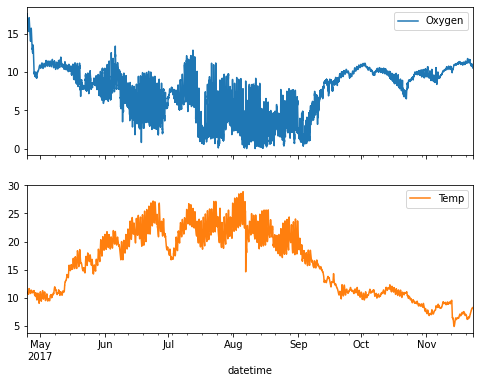

In [ ]:
cave_data1.plot(subplots=True, figsize=(8,6))

select dataframe shape:  (14593, 2)


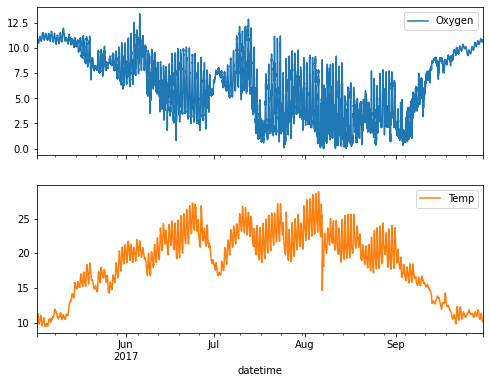

In [ ]:
### select  a subset of the data-frame 

cave_data1_may_sept = cave_data1["2017-05-01 15:00:00": "2017-09-30 15:00:00"]
print ('select dataframe shape: ', cave_data1_may_sept.shape)

fig, ax = cave_data1_may_sept.plot(subplots=True, figsize=(8, 6))

In [ ]:
#### select parts of dataframe based on column value ['Oxygen']

cave_data1_may_sept_O2_0_2d5 = cave_data1_may_sept[(cave_data1_may_sept['Oxygen'] >= 0.01) & (cave_data1_may_sept['Oxygen'] <= 0.5)]

print (cave_data1_may_sept_O2_0_2d5.shape)

(130, 2)


In [ ]:
cave_data1_may_sept_O2_0_2d5.head(10)

Oxygen   Temp
datetime                          
2017-07-24 20:00:00    0.42  21.72
2017-07-24 20:15:00    0.28  21.68
2017-07-24 20:30:00    0.08  21.64
2017-07-24 20:45:00    0.15  21.58
2017-07-25 02:30:00    0.38  20.50
2017-07-25 04:00:00    0.44  20.24
2017-07-25 05:30:00    0.46  20.06
2017-08-05 08:00:00    0.50  23.04
2017-08-06 03:15:00    0.31  23.28
2017-08-06 03:30:00    0.22  23.24

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


[0.  0.2 0.4 0.6 0.8 1. ]


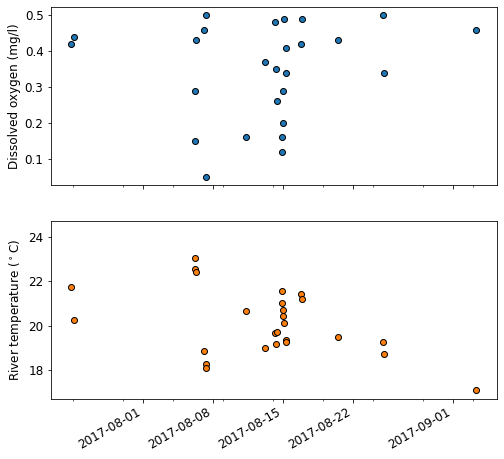

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8), sharex=True)
low_o2_17 = cave_data1_may_sept_O2_0_2d5.plot(subplots=True, linestyle='None', 
                                  markevery=5, marker='o', markeredgecolor='black', 
                                  ax=ax, sharex=True, legend=False)

low_o2_17[0].set_ylabel('Dissolved oxygen (mg/l)', fontsize=12)
low_o2_17[1].set_ylabel(r'River temperature $({}^\circ \mathrm{C})$', fontsize=12)
# low_o2_17[0].set_ylabel
plt.xticks(fontsize=12)
low_o2_17[0].tick_params(axis='both', which='major', labelsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
print(ax.get_xticks())

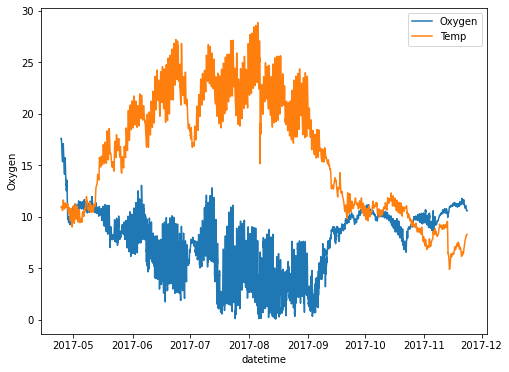

total samples of daily data:  10215


In [ ]:
resampled_oxygen1_30Minutes = cave_data1["Oxygen"].resample("30T").mean() # 
resampled_temp1_30Minutes = cave_data1["Temp"].resample("30T").mean() # 30 minutes

fig = plt.figure(figsize=(8, 6))
sns.lineplot(data = resampled_oxygen1_30Minutes, label='Oxygen')
sns.lineplot(data = resampled_temp1_30Minutes, label='Temp')
plt.show()

print ('total samples of daily data: ', len(resampled_oxygen1_30Minutes))

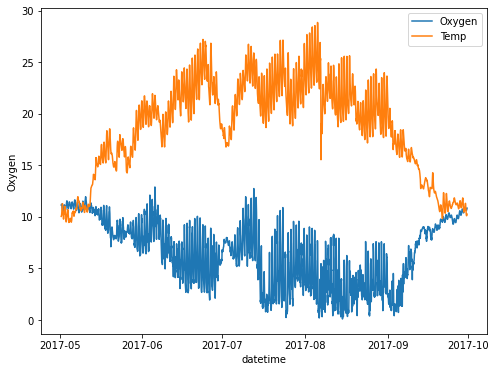

total samples of daily data:  3649


In [ ]:
resampled_oxygen1_h = cave_data1_may_sept["Oxygen"].resample("60T").mean() # hourly samples
resampled_temp1_h = cave_data1_may_sept["Temp"].resample("60T").mean() # hourly samples

fig = plt.figure(figsize=(8, 6))
sns.lineplot(data = resampled_oxygen1_h, label='Oxygen')
sns.lineplot(data = resampled_temp1_h, label='Temp')
plt.show()

print ('total samples of daily data: ', len(resampled_oxygen1_h))

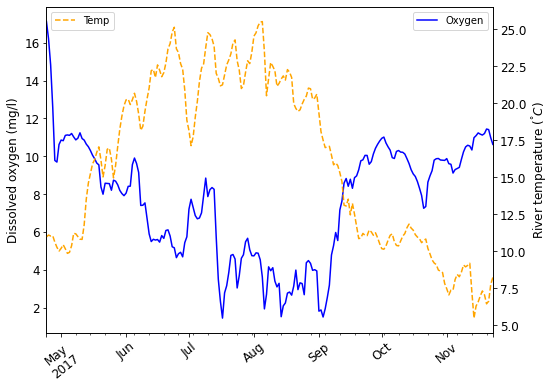

In [ ]:
resampled_oxygen1_Daily = cave_data1_may_sept["Oxygen"].resample("D").mean() # hourly samples
resampled_oxygen1_Daily_org = cave_data1["Oxygen"].resample("D").mean() # hourly samples
resampled_temp1_Daily = cave_data1_may_sept["Temp"].resample("D").mean() # hourly samples
resampled_temp1_Daily_org = cave_data1["Temp"].resample("D").mean() # hourly samples

ax = resampled_oxygen1_Daily_org.plot(color='blue', label='Oxygen', figsize=(8, 6))
ax2 = resampled_temp1_Daily_org.plot(secondary_y=True, color='orange', ax=ax, linestyle='--', legend=False)

ax.set_ylabel('Dissolved oxygen (mg/l)', fontsize=12)
ax2.set_ylabel(r'River temperature $({}^{\degree} C)$', fontsize=12)
ax.set_xlabel('')
ax.tick_params(axis='x', which='major', labelsize=12, rotation=39)
ax.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax.legend()
ax2.legend(['Temp'], loc=2)
plt.show()

---------

##Univariate Time Series  Anomaly Detection

---------

In [ ]:
### sliding window approach 

oxy2017 = cave_data1_may_sept['Oxygen']
# oxy2017.plot(figsize=(8, 6))
N = len(oxy2017)
time = np.arange(0, N)
print (len(cave_data1_may_sept), len(time))
print (len(cave_data1_may_sept['Temp']))

#################################
#used for setting labels
#################################
dt_ind = cave_data1_may_sept.index.tolist()

dt_ind_choice = dt_ind[::750]
time_choice = time[::750]
##################################


#####possible hyper-parameters
window_percentage = 96*1 # 24*4 for a single day
k = int(len(oxy2017) * (window_percentage/100))
print ('check: ', (k,N))
##########################

oxy2017 = oxy2017.to_numpy()

get_bands = lambda data : (np.mean(data) + 2*np.std(data), np.mean(data) - 2*np.std(data)) # check different sigma: 1, 2, 3
# get_bands = lambda data : (np.mean(data) + np.nanquantile(data, 0.99), np.mean(data) - np.nanquantile(data, 0.99))

bands = [get_bands(oxy2017[range(0 if i - k < 0 else i-k, i + k if i + k < N else N)]) for i in range(0, N)]
upper, lower = zip(*bands)

# compute local outliers 
# anomalies = (oxy2017 > upper) | (oxy2017 < lower)
anomalies = (oxy2017 < lower) # focus only where the values are too low

14593 14593
14593
check:  (14009, 14593)


In [ ]:
dt_ind_choice_m = dt_ind[::1500]
time_choice_m = time[::1500]

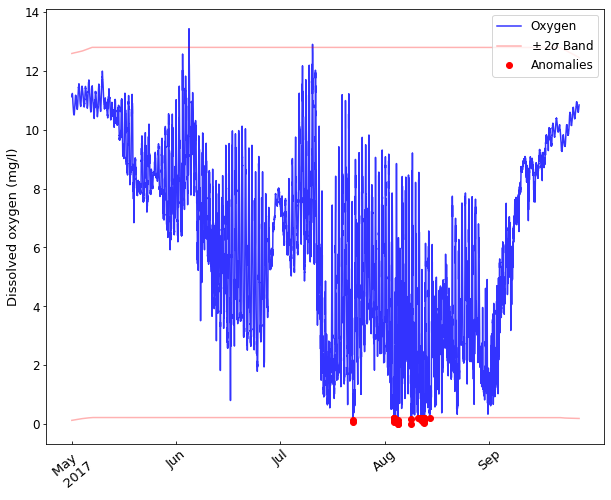

[    0  1500  3000  4500  6000  7500  9000 10500 12000 13500]


In [ ]:

label_dates = ['May \n 2017', 'Jun', 'Jul', 'Aug', 'Sep']
time_choice_m_sel = [0, 3000,  6000,  9000, 12000]

# plotting...
import matplotlib as mpl
label_size = 12


fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time, oxy2017, 'b', label='Oxygen', alpha=0.8)
plt.plot(time, upper, 'r-', label=r'$\pm\, 2\sigma$ Band',alpha=0.3)
plt.plot(time, lower,'r-',alpha=0.3)

plt.plot(time[anomalies], oxy2017[anomalies], 'ro', label='Anomalies')
#plt.fill_between(time, upper, lower, facecolor='red', alpha=0.1)
plt.xticks(time_choice_m_sel, label_dates, rotation=40, fontsize=13)
ax.tick_params(axis="x",direction="in", )
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=13)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.show()

print(time_choice_m)


In [ ]:
#######################
# check the dates
######################

print (oxy2017[anomalies])
print (time[anomalies])

print ('day and time for anomalies')
for i in range(len(time[anomalies])):
  print (dt_ind[time[anomalies][i]])


[0.08 0.15 0.22 0.19 0.19 0.15 0.17 0.16 0.08 0.21 0.   0.14 0.   0.05
 0.16 0.   0.22 0.2  0.22 0.15 0.15 0.16 0.19 0.14 0.12 0.12 0.1  0.1
 0.07 0.1  0.2  0.13 0.15 0.09 0.22 0.05 0.19 0.2  0.2  0.22]
[ 8086  8087  9266  9275  9276  9278  9279  9280  9281  9282  9379  9380
  9383  9384  9767  9770  9963 10039 10055 10058 10104 10105 10108 10109
 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10122
 10123 10124 10145 10294]
day and time for anomalies
2017-07-24 20:30:00
2017-07-24 20:45:00
2017-08-06 03:30:00
2017-08-06 05:45:00
2017-08-06 06:00:00
2017-08-06 06:30:00
2017-08-06 06:45:00
2017-08-06 07:00:00
2017-08-06 07:15:00
2017-08-06 07:30:00
2017-08-07 07:45:00
2017-08-07 08:00:00
2017-08-07 08:45:00
2017-08-07 09:00:00
2017-08-11 08:45:00
2017-08-11 09:30:00
2017-08-13 09:45:00
2017-08-14 04:45:00
2017-08-14 08:45:00
2017-08-14 09:30:00
2017-08-14 21:00:00
2017-08-14 21:15:00
2017-08-14 22:00:00
2017-08-14 22:15:00
2017-08-14 22:30:00
2017-08-14 22:45:00
2017-

## Setting up Data Structure & Python for Time Series Anomaly Detection


First we check auto-correlation and then apply ARIMA. 

Also for simplicity first we treat the problem as univariate time series. 

Check auto-correlation and partial auto-correlation. 

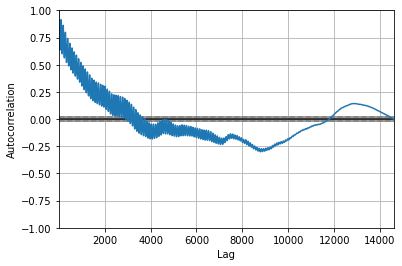

In [15]:
pd.plotting.autocorrelation_plot(cave_data1_may_sept['Oxygen'])

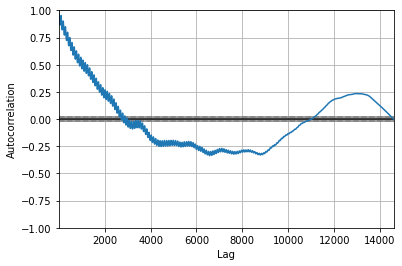

In [16]:
pd.plotting.autocorrelation_plot(cave_data1_may_sept['Temp'])

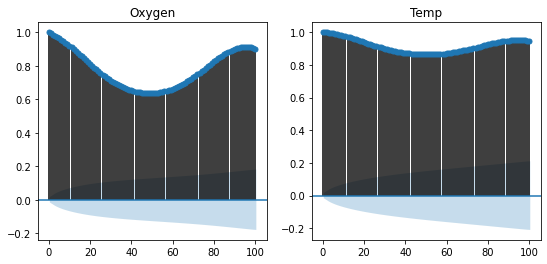

In [17]:

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plot_acf(cave_data1_may_sept['Oxygen'], axs[0], lags=100)
plot_acf(cave_data1_may_sept['Temp'], axs[1], lags=100)
axs[0].set_title('Oxygen')
axs[1].set_title('Temp')
plt.show()

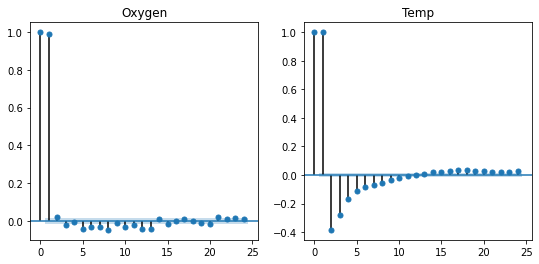

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plot_pacf(cave_data1_may_sept['Oxygen'], axs[0], lags=24)
plot_pacf(cave_data1_may_sept['Temp'], axs[1], lags=24)
axs[0].set_title('Oxygen')
axs[1].set_title('Temp')
plt.show()

### Checking if Data is Stationary

1. Check the Rolling Mean and Std. 
2. Check with ADCF test (Augmented Dickey-Fuller Test). 
3. We can also check KPSS test. 


### If the Data is Not Stationary

1. Try several schemes, best option is differencing. 

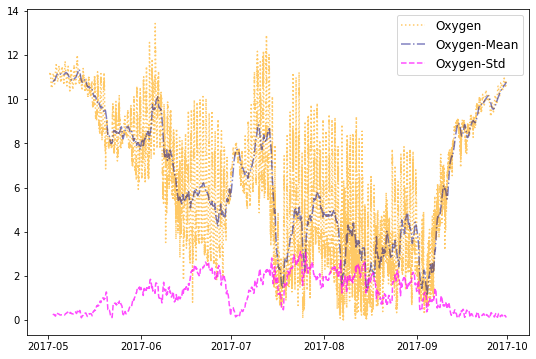

In [20]:
simple_oxygen_mean_may_sept = cave_data1_may_sept['Oxygen'].rolling(window=96).mean()
simple_std_oxygen_may_sept = cave_data1_may_sept['Oxygen'].rolling(window=96).std()

fig = plt.figure(figsize=(9, 6))
plt.plot(cave_data1_may_sept['Oxygen'], color='orange', linestyle=':', alpha=0.6, label='Oxygen')
plt.plot(simple_oxygen_mean_may_sept, color='navy', linestyle='-.', alpha=0.5, label='Oxygen-Mean')
plt.plot(simple_std_oxygen_may_sept, color='magenta', linestyle='--', alpha=0.7, label='Oxygen-Std')
plt.legend(fontsize=12, loc=1)
plt.show()

even though the rolling mean curve is not exactly parallel to X-axis, tje standard deviation (daily) curve seems almost parallel to x-axis. This is a possible indication that the time series is possibly stable with time. We will check this with the ACDF test. 

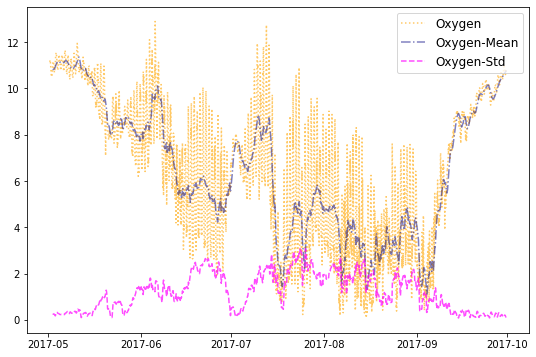

check the lens before and after rolling mean:  3649 3649 nan 0.0925 23 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]]


In [21]:
simple_oxygen_mean_may_sept_h = resampled_oxygen1_h.rolling(window=24).mean()
simple_std_oxygen_may_sept_h = resampled_oxygen1_h.rolling(window=24).std()

fig = plt.figure(figsize=(9, 6))
plt.plot(resampled_oxygen1_h, color='orange', linestyle=':', alpha=0.6, label='Oxygen')
plt.plot(simple_oxygen_mean_may_sept_h, color='navy', linestyle='-.', alpha=0.5, label='Oxygen-Mean')
plt.plot(simple_std_oxygen_may_sept_h, color='magenta', linestyle='--', alpha=0.7, label='Oxygen-Std')
plt.legend(fontsize=12, loc=1)
plt.show()

simple_oxygen_mean_may_sept_h_arr = simple_oxygen_mean_may_sept_h.to_numpy()

print ('check the lens before and after rolling mean: ', len(simple_oxygen_mean_may_sept_h), len(resampled_oxygen1_h), min(simple_oxygen_mean_may_sept_h), min(resampled_oxygen1_h), 
       np.isnan(simple_oxygen_mean_may_sept_h).sum(), np.argwhere(np.isnan(simple_oxygen_mean_may_sept_h_arr) ) ) 

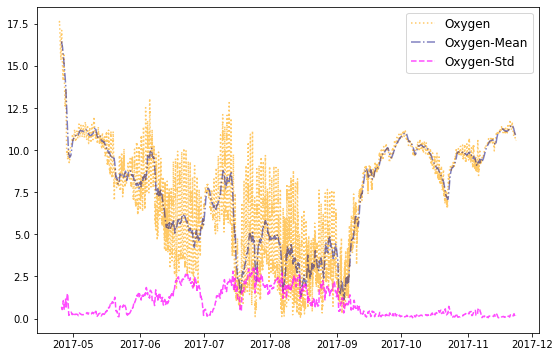

check the lens before and after rolling mean:  10215 10215 nan 0.085 47 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]]


In [22]:
simple_oxygen_mean_may_sept_30min = resampled_oxygen1_30Minutes.rolling(window=48).mean()
simple_std_oxygen_may_sept_30min = resampled_oxygen1_30Minutes.rolling(window=48).std()

fig = plt.figure(figsize=(9, 6))
plt.plot(resampled_oxygen1_30Minutes, color='orange', linestyle=':', alpha=0.6, label='Oxygen')
plt.plot(simple_oxygen_mean_may_sept_30min, color='navy', linestyle='-.', alpha=0.5, label='Oxygen-Mean')
plt.plot(simple_std_oxygen_may_sept_30min, color='magenta', linestyle='--', alpha=0.7, label='Oxygen-Std')
plt.legend(fontsize=12, loc=1)
plt.show()

simple_oxygen_mean_may_sept_30min_arr = simple_oxygen_mean_may_sept_30min.to_numpy()

print ('check the lens before and after rolling mean: ', len(simple_oxygen_mean_may_sept_30min), len(resampled_oxygen1_30Minutes), min(simple_oxygen_mean_may_sept_30min), min(resampled_oxygen1_30Minutes), 
       np.isnan(simple_oxygen_mean_may_sept_30min).sum(), np.argwhere(np.isnan(simple_oxygen_mean_may_sept_30min_arr) ) )

In [23]:
simple_oxygen_mean_may_sept_30min

datetime
2017-04-24 15:00:00          NaN
2017-04-24 15:30:00          NaN
2017-04-24 16:00:00          NaN
2017-04-24 16:30:00          NaN
2017-04-24 17:00:00          NaN
                         ...    
2017-11-23 08:00:00    10.842708
2017-11-23 08:30:00    10.836667
2017-11-23 09:00:00    10.831250
2017-11-23 09:30:00    10.826354
2017-11-23 10:00:00    10.821354
Freq: 30T, Name: Oxygen, Length: 10215, dtype: float64

In [24]:
simple_oxygen_mean_all_30min_nonan = simple_oxygen_mean_may_sept_30min.dropna()
simple_oxygen_mean_all_30min_nonan.shape

(10168,)

### Check with Adfuller test ([Augmented Dickey-Fuller Test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test))

Null hypotheses:  unit root present, 

Alternate hypotheses: stationary

In [25]:
from statsmodels.tsa.stattools import adfuller

# cave_data_testADF_log = adfuller(np.log10(cave_data1_may_sept['Oxygen'], out=np.zeros_like(cave_data1_may_sept['Oxygen']), 
#                                       where=(cave_data1_may_sept['Oxygen']!=0.0)), )

cave_data_testADF = adfuller(cave_data1_may_sept['Oxygen'], )

#np.log2(m, out=np.zeros_like(m), where=(m!=0))

cavedfoutput_ADF = pd.Series(cave_data_testADF[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in cave_data_testADF[4].items():
    cavedfoutput_ADF['Critical Value (%s)'%key] = value
    
print(cavedfoutput_ADF)

Test Statistic                -6.263090e+00
p-value                        4.176921e-08
#Lags Used                     4.200000e+01
Number of Observations Used    1.455000e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


Null hypothesis: Non Stationarity exists in the series.

Alternative Hypothesis: Stationarity exists in the series

Since critical value -6.26<-3.4,-2.8,-2.7 (t-values at 1%,5%and 10% confidence intervals), null hypothesis can be rejected. So there is stationarity in our data! 

Also p-value  $4e-8 < 0.05$ (if we take $5\%$ significance level or $95\%$ confidence interval), null hypothesis can be rejected.


But what if our data is less noisy, i.e. instead of 15 minute intervals we take 30 minutes or hourly samples?  

In [26]:
cave_data_testADF_h = adfuller(resampled_oxygen1_h, )

#np.log2(m, out=np.zeros_like(m), where=(m!=0))

cavedfoutput_ADF_h = pd.Series(cave_data_testADF_h[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in cave_data_testADF_h[4].items():
    cavedfoutput_ADF_h['Critical Value (%s)'%key] = value
    
print(cavedfoutput_ADF_h)

Test Statistic                   -1.801549
p-value                           0.379693
#Lags Used                       28.000000
Number of Observations Used    3620.000000
Critical Value (1%)              -3.432158
Critical Value (5%)              -2.862339
Critical Value (10%)             -2.567195
dtype: float64


In [27]:
cave_data_testADF_30min = adfuller(resampled_oxygen1_30Minutes, )

#np.log2(m, out=np.zeros_like(m), where=(m!=0))

cavedfoutput_ADF_30min = pd.Series(cave_data_testADF_30min[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in cave_data_testADF_30min[4].items():
    cavedfoutput_ADF_30min['Critical Value (%s)'%key] = value
    
print(cavedfoutput_ADF_30min)

Test Statistic                    -2.814597
p-value                            0.056219
#Lags Used                        39.000000
Number of Observations Used    10175.000000
Critical Value (1%)               -3.430993
Critical Value (5%)               -2.861824
Critical Value (10%)              -2.566921
dtype: float64


Reached to very different conclusion considering hourly data. 


Let's check this more using the [KPSS test](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html) (Kwiatkowski-Phillips-Schmidt-Shin).

Here null hypotheses is time-series is stationary

In [28]:
from statsmodels.tsa.stattools import kpss

cave_data_testkpss_h = kpss(resampled_oxygen1_h, 'ct', )

#np.log2(m, out=np.zeros_like(m), where=(m!=0))

cavedfoutput_kpss_h = pd.Series(cave_data_testkpss_h[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in cave_data_testkpss_h[3].items():
    cavedfoutput_kpss_h['Critical Value (%s)'%key] = value
    
print(cavedfoutput_kpss_h)

Test Statistic            1.694623
p-value                   0.010000
#Lags Used               30.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [29]:
from statsmodels.tsa.stattools import kpss

cave_data_testkpss_30min = kpss(resampled_oxygen1_30Minutes, 'ct', )

#np.log2(m, out=np.zeros_like(m), where=(m!=0))

cavedfoutput_kpss_30min = pd.Series(cave_data_testkpss_30min[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in cave_data_testkpss_30min[3].items():
    cavedfoutput_kpss_30min['Critical Value (%s)'%key] = value
    
print(cavedfoutput_kpss_30min)

Test Statistic            4.700792
p-value                   0.010000
#Lags Used               39.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


### Try to Make the Data Stationary

Try Differencing the rolling mean from original data. 

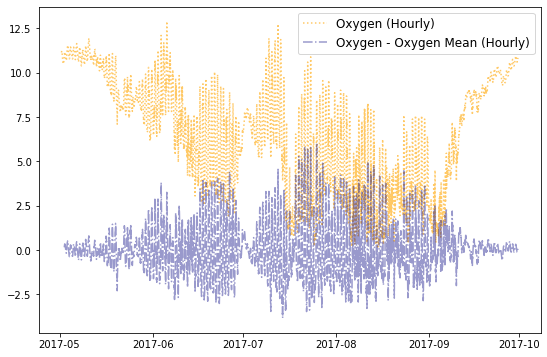

check min of difference series;  nan


In [30]:
check_diff_oxygen_h = resampled_oxygen1_h - simple_oxygen_mean_may_sept_h

fig = plt.figure(figsize=(9, 6))
plt.plot(resampled_oxygen1_h, color='orange', linestyle=':', alpha=0.6, label='Oxygen (Hourly)')
plt.plot(check_diff_oxygen_h, color='navy', linestyle='-.', alpha=0.4, label='Oxygen - Oxygen Mean (Hourly)')
plt.legend(fontsize=12)
plt.show()

print ('check min of difference series; ', min(check_diff_oxygen_h))

In [ ]:
np.isnan(resampled_oxygen1_30Minutes).sum()

0

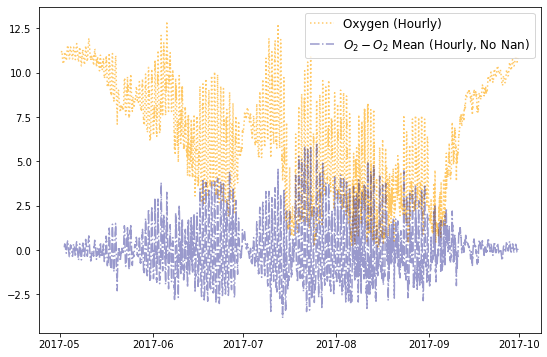

check min of difference series;  -3.8323958333333334


In [31]:
check_diff_oxygen_h_nonan = check_diff_oxygen_h.dropna()


fig = plt.figure(figsize=(9, 6))
plt.plot(resampled_oxygen1_h, color='orange', linestyle=':', alpha=0.6, label='Oxygen (Hourly)')
plt.plot(check_diff_oxygen_h_nonan, color='navy', linestyle='-.', alpha=0.4, label=r'$O_2 - O_2$ Mean (Hourly, No Nan)')
plt.legend(fontsize=12)
plt.show()

print ('check min of difference series; ', min(check_diff_oxygen_h_nonan))

10215
10168


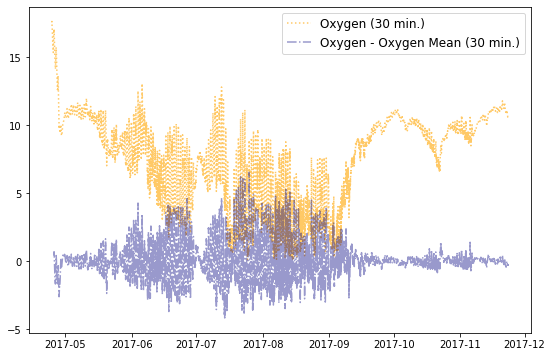

check min of difference series;  -4.172395833333332


In [32]:
check_diff_oxygen_30min = resampled_oxygen1_30Minutes - simple_oxygen_mean_may_sept_30min
print (len(check_diff_oxygen_30min))

check_diff_oxygen_30min_nonan = check_diff_oxygen_30min.dropna()
print (len(check_diff_oxygen_30min_nonan))

fig = plt.figure(figsize=(9, 6))
plt.plot(resampled_oxygen1_30Minutes, color='orange', linestyle=':', alpha=0.6, label='Oxygen (30 min.)')
plt.plot(check_diff_oxygen_30min_nonan, color='navy', linestyle='-.', alpha=0.4, label='Oxygen - Oxygen Mean (30 min.)')
plt.legend(fontsize=12)
plt.show()

print ('check min of difference series; ', min(check_diff_oxygen_30min_nonan))

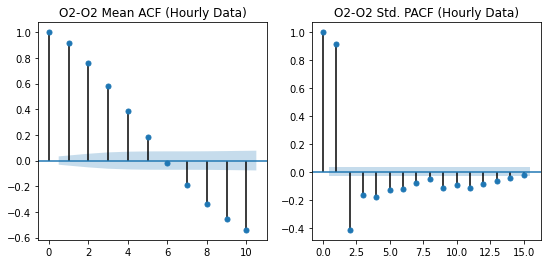

3626


In [33]:
### plot the same for the oxygen residual 

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plot_acf(check_diff_oxygen_h_nonan, axs[0], lags=10)
plot_pacf(check_diff_oxygen_h_nonan, axs[1], lags=15)
axs[0].set_title('O2-O2 Mean ACF (Hourly Data)')
axs[1].set_title('O2-O2 Std. PACF (Hourly Data)')
plt.show()
print (len(check_diff_oxygen_h_nonan))

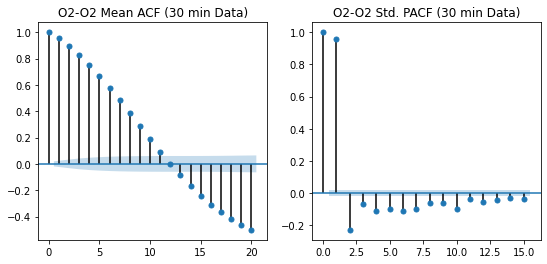

10215


In [34]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plot_acf(check_diff_oxygen_30min_nonan, axs[0], lags=20)
plot_pacf(check_diff_oxygen_30min_nonan, axs[1], lags=15)
axs[0].set_title('O2-O2 Mean ACF (30 min Data)')
axs[1].set_title('O2-O2 Std. PACF (30 min Data)')
plt.show()
print (len(resampled_oxygen1_30Minutes))

#### Check the ADF Test

Check the same adf test but now hopefully on a more stable data after subtracting the mean from the original data. 

In [35]:
cave_data_testADF_h_mean = adfuller(check_diff_oxygen_h_nonan, )

#np.log2(m, out=np.zeros_like(m), where=(m!=0))

cavedfoutput_ADF_h_mean = pd.Series(cave_data_testADF_h_mean[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in cave_data_testADF_h_mean[4].items():
    cavedfoutput_ADF_h_mean['Critical Value (%s)'%key] = value
    
print(cavedfoutput_ADF_h_mean)

Test Statistic                -1.138034e+01
p-value                        8.541894e-21
#Lags Used                     2.800000e+01
Number of Observations Used    3.597000e+03
Critical Value (1%)           -3.432169e+00
Critical Value (5%)           -2.862344e+00
Critical Value (10%)          -2.567198e+00
dtype: float64


#### Try several values in ARIMA (according to your problem)

Here, the result starts to stabilize over order 6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


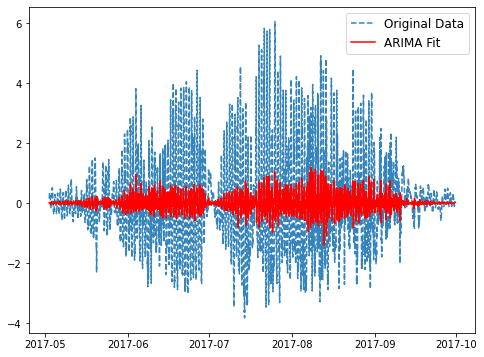

In [36]:
### apply arima with p, q obtained from before 
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(check_diff_oxygen_h_nonan, order=(1, 1, 1))
# results_ARIMA_mean_nonan_1 = model_1.fit(disp=-1)
results_ARIMA_mean_nonan_1 = model_1.fit()#(disp=-1)

fig = plt.figure(figsize=(8, 6))

plt.plot(check_diff_oxygen_h_nonan, alpha=0.9, linestyle='--', label='Original Data')
plt.plot(results_ARIMA_mean_nonan_1.fittedvalues, color='red',  label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

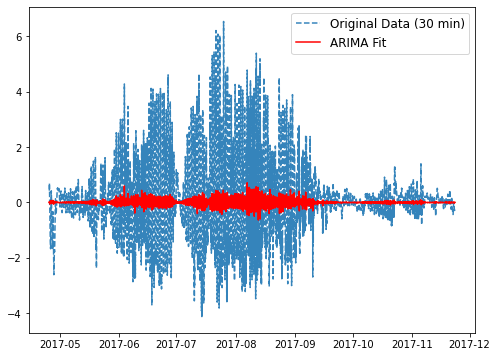

In [37]:
model_1_30min = ARIMA(check_diff_oxygen_30min_nonan, order=(1, 1, 1))
results_ARIMA_mean_nonan_1_30min = model_1_30min.fit() #(disp=-1)

fig = plt.figure(figsize=(8, 6))

plt.plot(check_diff_oxygen_30min_nonan, alpha=0.9, linestyle='--', label='Original Data (30 min)')
plt.plot(results_ARIMA_mean_nonan_1_30min.fittedvalues, color='red',  label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

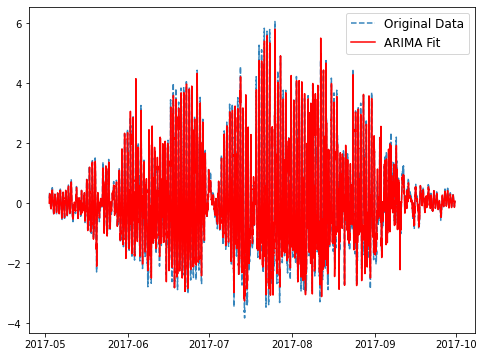

In [38]:
### apply arima with p, q obtained from before 
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(check_diff_oxygen_h_nonan, order=(6, 0, 1))
results_ARIMA_mean_nonan_4 = model.fit() #(disp=-1)

fig = plt.figure(figsize=(8, 6))

plt.plot(check_diff_oxygen_h_nonan, alpha=0.9, linestyle='--', label='Original Data')
plt.plot(results_ARIMA_mean_nonan_4.fittedvalues, color='red',  label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

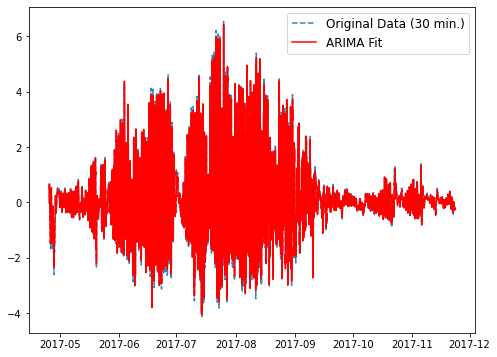

In [39]:
### apply arima with p, q obtained from before 
# from statsmodels.tsa.arima.model import ARIMA

model_2_30min = ARIMA(check_diff_oxygen_30min_nonan, order=(12, 0, 1)) # 6 to 14 almost similar
results_ARIMA_mean_nonan_4_30min = model_2_30min.fit() # (disp=-1)

fig = plt.figure(figsize=(8, 6))

plt.plot(check_diff_oxygen_30min_nonan, alpha=0.9, linestyle='--', label='Original Data (30 min.)')
plt.plot(results_ARIMA_mean_nonan_4_30min.fittedvalues, color='red',  label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

In [40]:
### arima_predictions

print (type(check_diff_oxygen_h_nonan))

diff_oxygen_hourly_nonan_df = check_diff_oxygen_h_nonan.to_frame()
diff_oxygen_hourly_nonan_df.head(3)

<class 'pandas.core.series.Series'>


Oxygen
datetime                     
2017-05-02 14:00:00  0.156458
2017-05-02 15:00:00  0.227813
2017-05-02 16:00:00  0.285417

In [41]:
### arima_predictions

print (type(check_diff_oxygen_30min_nonan))

diff_oxygen_30min_nonan_df = check_diff_oxygen_30min_nonan.to_frame()
diff_oxygen_30min_nonan_df.head(3)

<class 'pandas.core.series.Series'>


Oxygen
datetime                     
2017-04-25 14:30:00  0.429167
2017-04-25 15:00:00  0.453125
2017-04-25 15:30:00  0.458542

In [42]:
diff_oxygen_hourly_nonan_df['Arima_Preds'] = results_ARIMA_mean_nonan_4.fittedvalues
diff_oxygen_hourly_nonan_df.head(3)

Oxygen  Arima_Preds
datetime                                  
2017-05-02 14:00:00  0.156458    -0.000171
2017-05-02 15:00:00  0.227813     0.142701
2017-05-02 16:00:00  0.285417     0.229001

In [43]:
diff_oxygen_30min_nonan_df['Arima_Preds'] = results_ARIMA_mean_nonan_4_30min.fittedvalues
diff_oxygen_30min_nonan_df.head(3)

Oxygen  Arima_Preds
datetime                                  
2017-04-25 14:30:00  0.429167    -0.012497
2017-04-25 15:00:00  0.453125     0.409667
2017-04-25 15:30:00  0.458542     0.433340

In [44]:
### detecting anomalies by calculating error (differences)

def detect_classify_anomalies(df, window, color): # try several window depending on the problem in hand
  df['error']=df['Oxygen'] - df['Arima_Preds']
  df['percentage_change'] = ((df['Oxygen'] - df['Arima_Preds']) / df['Oxygen']) * 100
  df['anomaly_percentage_change'] = np.where(((df['Oxygen'] <0) & (df['percentage_change'] > 75)), df['Oxygen'], np.nan)
  df['meanval'] = df['error'].rolling(window=window).mean()
  df['deviation'] = df['error'].rolling(window=window).std() # std deviation
  df['-3s'] = df['meanval'] - (2.5 * df['deviation'])
  df['-2s'] = df['meanval'] - (1.80 * df['deviation'])
  df['-1s'] = df['meanval'] - (1. * df['deviation'])
  #cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
  cut_list = df[['error', '-3s', '-2s', '-1s']] # not interested in ['1s', '2s', '3s']
  cut_values = cut_list.values
  cut_sort = np.sort(cut_values)
  df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in
                  range(len(df['error']))]
  severity = {0: 3, 1: 2, 2: 1, 3: 0}
  region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE"}
  df['color'] =  df['impact'].map(severity)
  df['region'] = df['impact'].map(region)
  #df['anomaly_points'] = np.where(df['color'] == 2, df['Oxygen'], np.nan)
  df['anomaly_points'] = np.where(((df['Oxygen'] <0) & (df['color'] == color)), df['Oxygen'], np.nan)
  
  return df

In [45]:
classify_df=detect_classify_anomalies(diff_oxygen_hourly_nonan_df, 96, 3)
# classify_df.reset_index(inplace=True)
# del classify_df['index']
classify_df[2095:2105]

Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2017-07-28 21:00:00  0.049271     0.025736  0.023535          47.765604   
2017-07-28 22:00:00 -0.731875    -0.540989 -0.190886          26.081743   
2017-07-28 23:00:00 -1.061354    -1.295440  0.234086         -22.055423   
2017-07-29 00:00:00 -1.295000    -1.431496  0.136496         -10.540245   
2017-07-29 01:00:00 -1.338854    -1.577936  0.239082         -17.857227   
2017-07-29 02:00:00 -1.553646    -1.480707 -0.072939           4.694704   
2017-07-29 03:00:00 -1.400208    -1.629805  0.229596         -16.397308   
2017-07-29 04:00:00 -1.754271    -1.312044 -0.442226          25.208559   
2017-07-29 05:00:00 -1.634583    -1.665457  0.030874          -1.888776   
2017-07-29 06:00:00 -1.550937    -1.360231 -0.190706          12.296176   

                     anomaly_percentage_change   meanval  deviation       -3s  \
datetime                                                                        
2017-07-28 21:00:00                        NaN  0.093256   0.634744 -1.493604   
2017-07-28 22:00:00                        NaN  0.095536   0.633310 -1.487738   
2017-07-28 23:00:00                        NaN  0.099820   0.632836 -1.482271   
2017-07-29 00:00:00                        NaN  0.106036   0.630202 -1.469468   
2017-07-29 01:00:00                        NaN  0.112755   0.628121 -1.457548   
2017-07-29 02:00:00                        NaN  0.118515   0.623797 -1.440978   
2017-07-29 03:00:00                        NaN  0.123314   0.622850 -1.433812   
2017-07-29 04:00:00                        NaN  0.127846   0.617049 -1.414776   
2017-07-29 05:00:00                        NaN  0.133487   0.613616 -1.400552   
2017-07-29 06:00:00                        NaN  0.137679   0.609963 -1.387229   

                          -2s       -1s  impact  color    region  \
datetime                                                           
2017-07-28 21:00:00 -1.049283 -0.541488       3      0  NEGATIVE   
2017-07-28 22:00:00 -1.044421 -0.537774       3      0  NEGATIVE   
2017-07-28 23:00:00 -1.039286 -0.533017       3      0  NEGATIVE   
2017-07-29 00:00:00 -1.028327 -0.524166       3      0  NEGATIVE   
2017-07-29 01:00:00 -1.017863 -0.515366       3      0  NEGATIVE   
2017-07-29 02:00:00 -1.004320 -0.505282       3      0  NEGATIVE   
2017-07-29 03:00:00 -0.997817 -0.499537       3      0  NEGATIVE   
2017-07-29 04:00:00 -0.982842 -0.489203       3      0  NEGATIVE   
2017-07-29 05:00:00 -0.971021 -0.480129       3      0  NEGATIVE   
2017-07-29 06:00:00 -0.960255 -0.472284       3      0  NEGATIVE   

                     anomaly_points  
datetime                             
2017-07-28 21:00:00             NaN  
2017-07-28 22:00:00             NaN  
2017-07-28 23:00:00             NaN  
2017-07-29 00:00:00             NaN  
2017-07-29 01:00:00             NaN  
2017-07-29 02:00:00             NaN  
2017-07-29 03:00:00             NaN  
2017-07-29 04:00:00             NaN  
2017-07-29 05:00:00             NaN  
2017-07-29 06:00:00             NaN

In [46]:
classify_df_30min=detect_classify_anomalies(diff_oxygen_30min_nonan_df, 48*3, 3)
classify_df_30min[2095:2105]

Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2017-06-08 06:00:00 -2.656458    -2.386177 -0.270281          10.174488   
2017-06-08 06:30:00 -2.717813    -2.417511 -0.300302          11.049385   
2017-06-08 07:00:00 -2.862813    -2.464717 -0.398096          13.905764   
2017-06-08 07:30:00 -2.762708    -2.621231 -0.141478           5.120977   
2017-06-08 08:00:00 -2.531771    -2.461311 -0.070460           2.783014   
2017-06-08 08:30:00 -2.236354    -2.203737 -0.032617           1.458488   
2017-06-08 09:00:00 -2.516354    -1.904627 -0.611727          24.310061   
2017-06-08 09:30:00 -2.339896    -2.233316 -0.106580           4.554907   
2017-06-08 10:00:00 -1.826042    -1.978854  0.152812          -8.368505   
2017-06-08 10:30:00 -1.567292    -1.428228 -0.139064           8.872879   

                     anomaly_percentage_change   meanval  deviation       -3s  \
datetime                                                                        
2017-06-08 06:00:00                        NaN -0.030746   0.352413 -0.911779   
2017-06-08 06:30:00                        NaN -0.031501   0.352876 -0.913690   
2017-06-08 07:00:00                        NaN -0.032610   0.353781 -0.917062   
2017-06-08 07:30:00                        NaN -0.032341   0.353682 -0.916547   
2017-06-08 08:00:00                        NaN -0.031585   0.353482 -0.915290   
2017-06-08 08:30:00                        NaN -0.032884   0.353137 -0.915727   
2017-06-08 09:00:00                        NaN -0.036904   0.356417 -0.927946   
2017-06-08 09:30:00                        NaN -0.036430   0.356277 -0.927123   
2017-06-08 10:00:00                        NaN -0.042264   0.346034 -0.907350   
2017-06-08 10:30:00                        NaN -0.039397   0.343483 -0.898103   

                          -2s       -1s  impact  color    region  \
datetime                                                           
2017-06-08 06:00:00 -0.665090 -0.383159       3      0  NEGATIVE   
2017-06-08 06:30:00 -0.666677 -0.384376       3      0  NEGATIVE   
2017-06-08 07:00:00 -0.669415 -0.386391       2      1  NEGATIVE   
2017-06-08 07:30:00 -0.668969 -0.386023       3      0  NEGATIVE   
2017-06-08 08:00:00 -0.667853 -0.385067       3      0  NEGATIVE   
2017-06-08 08:30:00 -0.668531 -0.386021       3      0  NEGATIVE   
2017-06-08 09:00:00 -0.678454 -0.393321       2      1  NEGATIVE   
2017-06-08 09:30:00 -0.677729 -0.392707       3      0  NEGATIVE   
2017-06-08 10:00:00 -0.665126 -0.388298       3      0  NEGATIVE   
2017-06-08 10:30:00 -0.657665 -0.382879       3      0  NEGATIVE   

                     anomaly_points  
datetime                             
2017-06-08 06:00:00             NaN  
2017-06-08 06:30:00             NaN  
2017-06-08 07:00:00             NaN  
2017-06-08 07:30:00             NaN  
2017-06-08 08:00:00             NaN  
2017-06-08 08:30:00             NaN  
2017-06-08 09:00:00             NaN  
2017-06-08 09:30:00             NaN  
2017-06-08 10:00:00             NaN  
2017-06-08 10:30:00             NaN

In [47]:
classify_df_30min.tail(5)

Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2017-11-23 08:00:00 -0.257708    -0.221182 -0.036526          14.173573   
2017-11-23 08:30:00 -0.256667    -0.216922 -0.039744          15.484741   
2017-11-23 09:00:00 -0.246250    -0.217038 -0.029212          11.862575   
2017-11-23 09:30:00 -0.221354    -0.203799 -0.017555           7.930798   
2017-11-23 10:00:00 -0.211354    -0.178083 -0.033271          15.741828   

                     anomaly_percentage_change   meanval  deviation       -3s  \
datetime                                                                        
2017-11-23 08:00:00                        NaN -0.009970   0.031523 -0.088777   
2017-11-23 08:30:00                        NaN -0.010096   0.031606 -0.089112   
2017-11-23 09:00:00                        NaN -0.010596   0.031332 -0.088927   
2017-11-23 09:30:00                        NaN -0.010772   0.031300 -0.089021   
2017-11-23 10:00:00                        NaN -0.011413   0.030803 -0.088419   

                          -2s       -1s  impact  color    region  \
datetime                                                           
2017-11-23 08:00:00 -0.066711 -0.041493       3      0  NEGATIVE   
2017-11-23 08:30:00 -0.066988 -0.041703       3      0  NEGATIVE   
2017-11-23 09:00:00 -0.066994 -0.041929       3      0  NEGATIVE   
2017-11-23 09:30:00 -0.067111 -0.042072       3      0  NEGATIVE   
2017-11-23 10:00:00 -0.066857 -0.042215       3      0  NEGATIVE   

                     anomaly_points  
datetime                             
2017-11-23 08:00:00             NaN  
2017-11-23 08:30:00             NaN  
2017-11-23 09:00:00             NaN  
2017-11-23 09:30:00             NaN  
2017-11-23 10:00:00             NaN

In [48]:
len(classify_df['anomaly_percentage_change']<-85.0)

3626

In [ ]:
# classify_df[['Oxygen', 'Arima_Preds', 'anomaly_points']].plot(subplots=True, figsize=(9, 7))

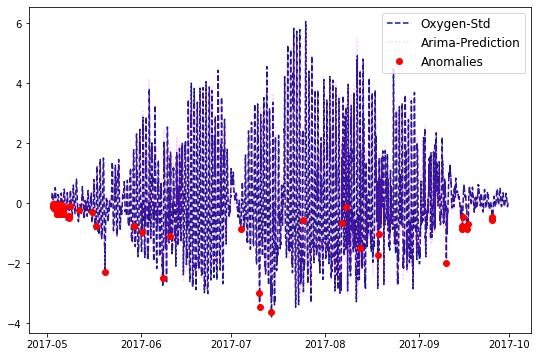

In [49]:

fig = plt.figure(figsize=(9, 6))
#plt.plot(cave_data1_may_sept['Oxygen'], color='orange', linestyle=':', alpha=0.6, label='Oxygen')
plt.plot(classify_df.Oxygen, color='navy', linestyle='--', alpha=0.9, label='Oxygen-Std')
plt.plot(classify_df.Arima_Preds, color='magenta', linestyle=':', alpha=0.2, label='Arima-Prediction')
plt.plot(classify_df.anomaly_points, color='red', linestyle='None', marker='o', label='Anomalies')
plt.legend(fontsize=12, loc=1)
plt.show()

10168


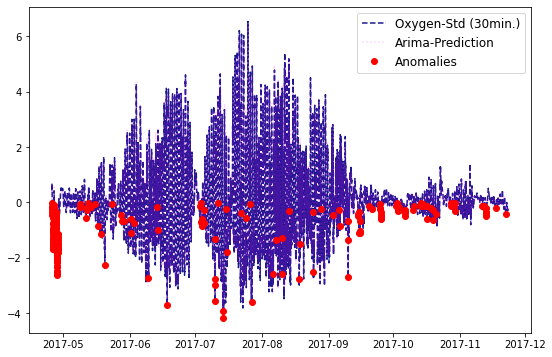

In [50]:
print (len(classify_df_30min.anomaly_points))
fig = plt.figure(figsize=(9, 6))
#plt.plot(cave_data1_may_sept['Oxygen'], color='orange', linestyle=':', alpha=0.6, label='Oxygen')
plt.plot(classify_df_30min.Oxygen, color='navy', linestyle='--', alpha=0.9, label='Oxygen-Std (30min.)')
plt.plot(classify_df_30min.Arima_Preds, color='magenta', linestyle=':', alpha=0.2, label='Arima-Prediction')
plt.plot(classify_df_30min.anomaly_points, color='red', linestyle='None', marker='o', label='Anomalies')
plt.legend(fontsize=12, loc=1)
plt.show()

In [ ]:
print (len(classify_df.Oxygen), len(simple_oxygen_mean_may_sept_h))

3626 3649


In [51]:
print (simple_oxygen_mean_may_sept_h.isna().sum())
simple_oxygen_mean_may_sept_h_nonan = simple_oxygen_mean_may_sept_h.dropna()

23


In [52]:
print (simple_oxygen_mean_may_sept_30min.isna().sum())
simple_oxygen_mean_may_sept_30min_nonan = simple_oxygen_mean_may_sept_30min.dropna()

47


In [53]:
simple_oxygen_mean_may_sept_h_nonan.head(10)

datetime
2017-05-02 14:00:00    10.828542
2017-05-02 15:00:00    10.824687
2017-05-02 16:00:00    10.822083
2017-05-02 17:00:00    10.819896
2017-05-02 18:00:00    10.817292
2017-05-02 19:00:00    10.814896
2017-05-02 20:00:00    10.814479
2017-05-02 21:00:00    10.816458
2017-05-02 22:00:00    10.821146
2017-05-02 23:00:00    10.826250
Freq: 60T, Name: Oxygen, dtype: float64

In [54]:
print (len(classify_df.Oxygen), len(simple_oxygen_mean_may_sept_h_nonan))

3626 3626


In [55]:
print (len(classify_df_30min.Oxygen), len(simple_oxygen_mean_may_sept_30min_nonan))

10168 10168


In [56]:
classify_df['Mean_Oxy'] = simple_oxygen_mean_may_sept_h_nonan
classify_df['TotOxy'] = classify_df['Mean_Oxy'] + classify_df['Oxygen']
classify_df['FinalAnomaly'] = classify_df['anomaly_points'] + simple_oxygen_mean_may_sept_h_nonan 
classify_df.drop(labels='region', axis=1, inplace=True)
classify_df.head(3)

Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2017-05-02 14:00:00  0.156458    -0.000171  0.156630         100.109551   
2017-05-02 15:00:00  0.227813     0.142701  0.085111          37.360264   
2017-05-02 16:00:00  0.285417     0.229001  0.056415          19.765943   

                     anomaly_percentage_change  meanval  deviation  -3s  -2s  \
datetime                                                                       
2017-05-02 14:00:00                        NaN      NaN        NaN  NaN  NaN   
2017-05-02 15:00:00                        NaN      NaN        NaN  NaN  NaN   
2017-05-02 16:00:00                        NaN      NaN        NaN  NaN  NaN   

                     -1s  impact  color  anomaly_points   Mean_Oxy   TotOxy  \
datetime                                                                      
2017-05-02 14:00:00  NaN       0      3             NaN  10.828542  10.9850   
2017-05-02 15:00:00  NaN       0      3             NaN  10.824687  11.0525   
2017-05-02 16:00:00  NaN       0      3             NaN  10.822083  11.1075   

                     FinalAnomaly  
datetime                           
2017-05-02 14:00:00           NaN  
2017-05-02 15:00:00           NaN  
2017-05-02 16:00:00           NaN

In [57]:
classify_df_30min['Mean_Oxy'] = simple_oxygen_mean_may_sept_30min_nonan
classify_df_30min['TotOxy'] = classify_df_30min['Mean_Oxy'] + classify_df_30min['Oxygen']
classify_df_30min['FinalAnomaly'] = classify_df_30min['anomaly_points'] + simple_oxygen_mean_may_sept_30min_nonan 
classify_df_30min.drop(labels='region', axis=1, inplace=True)
classify_df_30min.head(3)

Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2017-04-25 14:30:00  0.429167    -0.012497  0.441664         102.911963   
2017-04-25 15:00:00  0.453125     0.409667  0.043458           9.590652   
2017-04-25 15:30:00  0.458542     0.433340  0.025201           5.495938   

                     anomaly_percentage_change  meanval  deviation  -3s  -2s  \
datetime                                                                       
2017-04-25 14:30:00                        NaN      NaN        NaN  NaN  NaN   
2017-04-25 15:00:00                        NaN      NaN        NaN  NaN  NaN   
2017-04-25 15:30:00                        NaN      NaN        NaN  NaN  NaN   

                     -1s  impact  color  anomaly_points   Mean_Oxy  TotOxy  \
datetime                                                                     
2017-04-25 14:30:00  NaN       0      3             NaN  16.460833   16.89   
2017-04-25 15:00:00  NaN       0      3             NaN  16.446875   16.90   
2017-04-25 15:30:00  NaN       0      3             NaN  16.431458   16.89   

                     FinalAnomaly  
datetime                           
2017-04-25 14:30:00           NaN  
2017-04-25 15:00:00           NaN  
2017-04-25 15:30:00           NaN

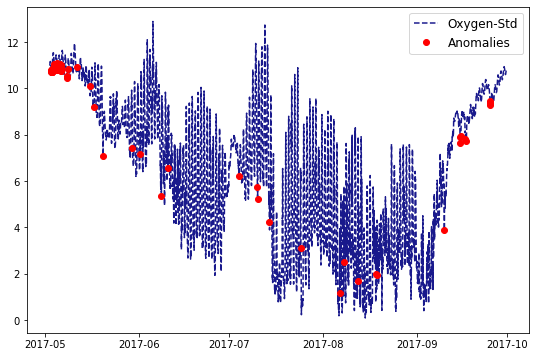

In [58]:
fig = plt.figure(figsize=(9, 6))
plt.plot(classify_df.TotOxy, color='navy', linestyle='--', alpha=0.9, label='Oxygen-Std')
plt.plot(classify_df.FinalAnomaly, color='red', linestyle='None', marker='o', label='Anomalies')
plt.legend(fontsize=12, loc=1)
plt.show()

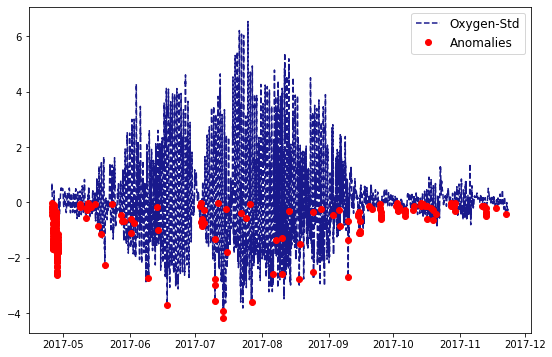

In [59]:
fig = plt.figure(figsize=(9, 6))
plt.plot(classify_df_30min.Oxygen, color='navy', linestyle='--', alpha=0.9, label='Oxygen-Std')
plt.plot(classify_df_30min.anomaly_points, color='red', linestyle='None', marker='o', label='Anomalies')
plt.legend(fontsize=12, loc=1)
plt.show()

In [60]:
classify_df_30min_May_Sept = classify_df_30min["2017-05-01 15:00:00": "2017-09-30 15:00:00"]
resampled_oxygen1_30Minutes_an = classify_df_30min_May_Sept["TotOxy"].resample("720T").mean() # 
resampled_30Minutes_anomaly = classify_df_30min_May_Sept["FinalAnomaly"].resample("W").mean() # 30 minutes

In [61]:
print(len(resampled_30Minutes_anomaly), len(classify_df_30min_May_Sept["FinalAnomaly"]))
classify_df_30min_May_Sept.tail(5)

22 7297


Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2017-09-30 13:00:00 -0.007708    -0.026775  0.019067        -247.355808   
2017-09-30 13:30:00  0.023229    -0.004585  0.027814         119.737258   
2017-09-30 14:00:00  0.044167     0.026646  0.017520          39.668408   
2017-09-30 14:30:00  0.060521     0.045632  0.014889          24.601172   
2017-09-30 15:00:00  0.081667     0.063217  0.018449          22.591159   

                     anomaly_percentage_change   meanval  deviation       -3s  \
datetime                                                                        
2017-09-30 13:00:00                        NaN  0.025805   0.014024 -0.009256   
2017-09-30 13:30:00                        NaN  0.025663   0.013898 -0.009081   
2017-09-30 14:00:00                        NaN  0.025696   0.013872 -0.008984   
2017-09-30 14:30:00                        NaN  0.025502   0.013826 -0.009063   
2017-09-30 15:00:00                        NaN  0.025364   0.013796 -0.009126   

                          -2s       -1s  impact  color  anomaly_points  \
datetime                                                                 
2017-09-30 13:00:00  0.000561  0.011781       3      0             NaN   
2017-09-30 13:30:00  0.000647  0.011765       3      0             NaN   
2017-09-30 14:00:00  0.000726  0.011824       3      0             NaN   
2017-09-30 14:30:00  0.000615  0.011676       3      0             NaN   
2017-09-30 15:00:00  0.000531  0.011568       3      0             NaN   

                      Mean_Oxy  TotOxy  FinalAnomaly  
datetime                                              
2017-09-30 13:00:00  10.752708  10.745           NaN  
2017-09-30 13:30:00  10.756771  10.780           NaN  
2017-09-30 14:00:00  10.760833  10.805           NaN  
2017-09-30 14:30:00  10.764479  10.825           NaN  
2017-09-30 15:00:00  10.768333  10.850           NaN

In [62]:
len(classify_df_30min_May_Sept), len(resampled_oxygen1_30Minutes_an)

(7297, 305)

In [63]:
import datetime

date_time_str = '2017-09-30 15:00:00'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

Date: 2017-09-30
Time: 15:00:00
Date-time: 2017-09-30 15:00:00


In [64]:
future_dates_1D = pd.date_range(start='2017-09-30', periods=48, freq='30T')
print(future_dates_1D, len(future_dates_1D))
future_dates_hD = pd.date_range(start='2017-09-30', periods=24, freq='30T')
print(future_dates_hD, len(future_dates_hD))

DatetimeIndex(['2017-09-30 00:00:00', '2017-09-30 00:30:00',
               '2017-09-30 01:00:00', '2017-09-30 01:30:00',
               '2017-09-30 02:00:00', '2017-09-30 02:30:00',
               '2017-09-30 03:00:00', '2017-09-30 03:30:00',
               '2017-09-30 04:00:00', '2017-09-30 04:30:00',
               '2017-09-30 05:00:00', '2017-09-30 05:30:00',
               '2017-09-30 06:00:00', '2017-09-30 06:30:00',
               '2017-09-30 07:00:00', '2017-09-30 07:30:00',
               '2017-09-30 08:00:00', '2017-09-30 08:30:00',
               '2017-09-30 09:00:00', '2017-09-30 09:30:00',
               '2017-09-30 10:00:00', '2017-09-30 10:30:00',
               '2017-09-30 11:00:00', '2017-09-30 11:30:00',
               '2017-09-30 12:00:00', '2017-09-30 12:30:00',
               '2017-09-30 13:00:00', '2017-09-30 13:30:00',
               '2017-09-30 14:00:00', '2017-09-30 14:30:00',
               '2017-09-30 15:00:00', '2017-09-30 15:30:00',
               '2017-09-

In [65]:
 
n_periods = 24
x = results_ARIMA_mean_nonan_4_30min.forecast(24, alpha=0.05)
print(x) 
mean_oxy2017 = simple_oxygen_mean_may_sept_30min_nonan

(array([-0.17143453, -0.12831135, -0.08620215, -0.04648875, -0.00877626,
        0.02596165,  0.05911758,  0.08939693,  0.11487393,  0.13786021,
        0.15682243,  0.17216391,  0.18346914,  0.19119665,  0.19539716,
        0.19620397,  0.19359904,  0.18766548,  0.17873662,  0.1670172 ,
        0.15285592,  0.13652549,  0.11841958,  0.09890366]), array([0.34864415, 0.5136833 , 0.62355886, 0.70934132, 0.778588  ,
       0.83716525, 0.88716882, 0.92597985, 0.95448127, 0.97834593,
       0.99490766, 1.00584148, 1.01230601, 1.01593442, 1.01759975,
       1.01803822, 1.01803844, 1.0184181 , 1.01983507, 1.02284572,
       1.02779227, 1.03487036, 1.04399813, 1.05496851]), array([[-0.85476451,  0.51189545],
       [-1.13511213,  0.87848942],
       [-1.30835506,  1.13595076],
       [-1.43677219,  1.34379469],
       [-1.53478069,  1.51722817],
       [-1.61485209,  1.66677538],
       [-1.67970136,  1.79793651],
       [-1.72549022,  1.90428408],
       [-1.75587499,  1.98562285],
       [-1

In [66]:
print(len(resampled_30Minutes_anomaly))
print(resampled_30Minutes_anomaly, type(resampled_30Minutes_anomaly))

22
datetime
2017-05-07          NaN
2017-05-14    10.801429
2017-05-21     8.801250
2017-05-28     8.116250
2017-06-04     7.341667
2017-06-11     4.660000
2017-06-18     3.846667
2017-06-25          NaN
2017-07-02          NaN
2017-07-09     6.622500
2017-07-16     5.273333
2017-07-23     4.645000
2017-07-30     2.915000
2017-08-06     0.320000
2017-08-13     2.110000
2017-08-20     1.170000
2017-08-27     1.942500
2017-09-03     2.945000
2017-09-10     3.346000
2017-09-17     7.960714
2017-09-24     9.416667
2017-10-01     9.542143
Freq: W-SUN, Name: FinalAnomaly, dtype: float64 <class 'pandas.core.series.Series'>


In [67]:
resampled_30Minutes_anomaly.index[5]
resampled_30Minutes_anomaly_drop = resampled_30Minutes_anomaly.drop(labels=[resampled_30Minutes_anomaly.index[10], resampled_30Minutes_anomaly.index[11]], 
                                                                    inplace=False)
print (resampled_30Minutes_anomaly_drop, len(resampled_30Minutes_anomaly_drop))

datetime
2017-05-07          NaN
2017-05-14    10.801429
2017-05-21     8.801250
2017-05-28     8.116250
2017-06-04     7.341667
2017-06-11     4.660000
2017-06-18     3.846667
2017-06-25          NaN
2017-07-02          NaN
2017-07-09     6.622500
2017-07-30     2.915000
2017-08-06     0.320000
2017-08-13     2.110000
2017-08-20     1.170000
2017-08-27     1.942500
2017-09-03     2.945000
2017-09-10     3.346000
2017-09-17     7.960714
2017-09-24     9.416667
2017-10-01     9.542143
Name: FinalAnomaly, dtype: float64 20


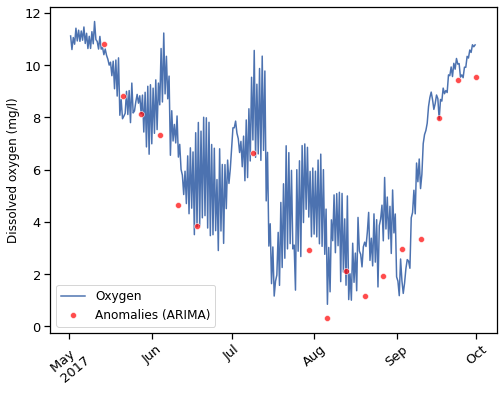

[736450. 736481. 736511. 736542. 736573. 736603.]


In [68]:
get_xticks_2017 = [736450., 736481., 736511., 736542., 736573., 736603.]
x_labels_2017_anomaly = ['May \n 2017', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

sns.set_theme(style={'axes.facecolor': 'white', 'ytick.left': True, 'xtick.bottom': True,}, 
              font_scale=1.1, )
fig = plt.figure(figsize=(8, 6))
lin = sns.lineplot(data = resampled_oxygen1_30Minutes_an, label='Oxygen')
lin = sns.lineplot(data = resampled_30Minutes_anomaly_drop, marker='o', linestyle='', 
                   label='Anomalies (ARIMA)', color='red', alpha=0.7)
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=12)
plt.xlabel('')
# plt.xticks(x_ticks_sns2021, x_labels_2021_anomaly, rotation=40, fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(get_xticks_2017, x_labels_2017_anomaly, fontsize=13, rotation=40)
plt.show()

print(lin.get_xticks())

In [69]:
print(len(resampled_oxygen1_30Minutes_an), len(resampled_30Minutes_anomaly_drop)) 
print (resampled_30Minutes_anomaly_drop)

305 20
datetime
2017-05-07          NaN
2017-05-14    10.801429
2017-05-21     8.801250
2017-05-28     8.116250
2017-06-04     7.341667
2017-06-11     4.660000
2017-06-18     3.846667
2017-06-25          NaN
2017-07-02          NaN
2017-07-09     6.622500
2017-07-30     2.915000
2017-08-06     0.320000
2017-08-13     2.110000
2017-08-20     1.170000
2017-08-27     1.942500
2017-09-03     2.945000
2017-09-10     3.346000
2017-09-17     7.960714
2017-09-24     9.416667
2017-10-01     9.542143
Name: FinalAnomaly, dtype: float64


In [70]:
model_2_30min_all = ARIMA(simple_oxygen_mean_all_30min_nonan, order=(7, 0, 1)) # try several values for the order 
# for future prediction we try same as anomaly detection process # 5 to 15
results_ARIMA_mean_nonan_4_30min_all = model_2_30min_all.fit() # (disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available',

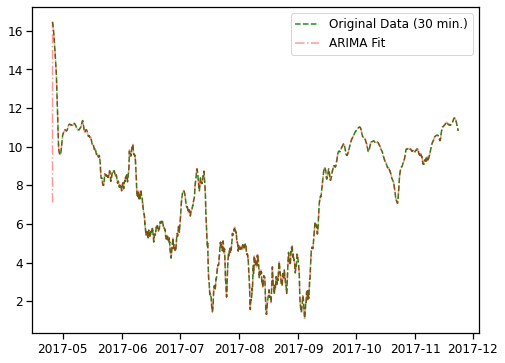

In [71]:
fig = plt.figure(figsize=(8, 6))

plt.plot(simple_oxygen_mean_all_30min_nonan, alpha=0.9, linestyle='--', color='green', label='Original Data (30 min.)')
plt.plot(results_ARIMA_mean_nonan_4_30min_all.fittedvalues, color='red', alpha=0.4, linestyle='-.', label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

In [72]:
n_periods = 24
x = results_ARIMA_mean_nonan_4_30min_all.forecast(steps=24, alpha=0.05)
print(x)
#print (x.conf_int(0.05)) 

(array([10.81622545, 10.81101014, 10.80576266, 10.80051092, 10.79523267,
       10.78991887, 10.78460986, 10.77932889, 10.77405823, 10.76879902,
       10.76355578, 10.75833474, 10.75314172, 10.74797664, 10.74283758,
       10.73772632, 10.73264447, 10.72759104, 10.72256531, 10.71756652,
       10.71259402, 10.70764746, 10.70272608, 10.69782891]), array([0.00949754, 0.02081371, 0.03332664, 0.04657373, 0.06024022,
       0.07424524, 0.08855852, 0.10289228, 0.1170413 , 0.13116739,
       0.14524257, 0.15921556, 0.17306054, 0.18675765, 0.20030844,
       0.21372764, 0.22701329, 0.24016078, 0.2531797 , 0.26607564,
       0.27885232, 0.29151315, 0.30406007, 0.31649534]), array([[10.79761061, 10.83484029],
       [10.77021602, 10.85180427],
       [10.74044365, 10.87108167],
       [10.70922809, 10.89179374],
       [10.67716401, 10.91330133],
       [10.64440087, 10.93543686],
       [10.61103834, 10.95818138],
       [10.57766372, 10.98099406],
       [10.54466149, 11.00345497],
       [10

In [73]:
# Forecast
fc_x, se_x, conf_x = results_ARIMA_mean_nonan_4_30min_all.forecast(15, alpha=0.05)

In [74]:
n_periods = 48
x_48 = results_ARIMA_mean_nonan_4_30min_all.forecast(n_periods, alpha=0.05) # get_forecast
#print(x_48)
# print (x.conf_int(0.05)) 

(array([10.81622545, 10.81101014, 10.80576266, 10.80051092, 10.79523267,
       10.78991887, 10.78460986, 10.77932889, 10.77405823, 10.76879902,
       10.76355578, 10.75833474, 10.75314172, 10.74797664, 10.74283758,
       10.73772632, 10.73264447, 10.72759104, 10.72256531, 10.71756652,
       10.71259402, 10.70764746, 10.70272608, 10.69782891, 10.69295521,
       10.68810435, 10.6832756 , 10.67846829, 10.67368172, 10.66891525,
       10.66416829, 10.65944029, 10.65473067, 10.6500389 , 10.64536448,
       10.64070693, 10.63606578, 10.63144059, 10.62683093, 10.6222364 ,
       10.61765659, 10.61309115, 10.60853969, 10.60400188, 10.59947739,
       10.59496589, 10.59046707, 10.58598064]), array([0.00949754, 0.02081371, 0.03332664, 0.04657373, 0.06024022,
       0.07424524, 0.08855852, 0.10289228, 0.1170413 , 0.13116739,
       0.14524257, 0.15921556, 0.17306054, 0.18675765, 0.20030844,
       0.21372764, 0.22701329, 0.24016078, 0.2531797 , 0.26607564,
       0.27885232, 0.29151315, 0.30

In [82]:
n_periods = 96
x_96 = results_ARIMA_mean_nonan_4_30min_all.forecast(n_periods, alpha=0.05)
# print(x_96)

In [76]:
future_dates_1D_Nov = pd.date_range(start='2017-11-23 0:30:00', periods=48, freq='30T')
print(future_dates_1D_Nov, len(future_dates_1D_Nov))

DatetimeIndex(['2017-11-23 00:30:00', '2017-11-23 01:00:00',
               '2017-11-23 01:30:00', '2017-11-23 02:00:00',
               '2017-11-23 02:30:00', '2017-11-23 03:00:00',
               '2017-11-23 03:30:00', '2017-11-23 04:00:00',
               '2017-11-23 04:30:00', '2017-11-23 05:00:00',
               '2017-11-23 05:30:00', '2017-11-23 06:00:00',
               '2017-11-23 06:30:00', '2017-11-23 07:00:00',
               '2017-11-23 07:30:00', '2017-11-23 08:00:00',
               '2017-11-23 08:30:00', '2017-11-23 09:00:00',
               '2017-11-23 09:30:00', '2017-11-23 10:00:00',
               '2017-11-23 10:30:00', '2017-11-23 11:00:00',
               '2017-11-23 11:30:00', '2017-11-23 12:00:00',
               '2017-11-23 12:30:00', '2017-11-23 13:00:00',
               '2017-11-23 13:30:00', '2017-11-23 14:00:00',
               '2017-11-23 14:30:00', '2017-11-23 15:00:00',
               '2017-11-23 15:30:00', '2017-11-23 16:00:00',
               '2017-11-

In [77]:
future_dates_2D_Nov = pd.date_range(start='2017-11-23 0:30:00', periods=96, freq='30T')

In [78]:
print((results_ARIMA_mean_nonan_4_30min_all.fittedvalues))
all_2017_fit_startmay = results_ARIMA_mean_nonan_4_30min_all.fittedvalues["2017-05-01 15:00:00": "2017-11-30 15:00:00"]

datetime
2017-04-25 14:30:00     7.109845
2017-04-25 15:00:00    16.460473
2017-04-25 15:30:00    16.433622
2017-04-25 16:00:00    16.416935
2017-04-25 16:30:00    16.408873
                         ...    
2017-11-23 08:00:00    10.842592
2017-11-23 08:30:00    10.836404
2017-11-23 09:00:00    10.830607
2017-11-23 09:30:00    10.825830
2017-11-23 10:00:00    10.821395
Freq: 30T, Length: 10168, dtype: float64


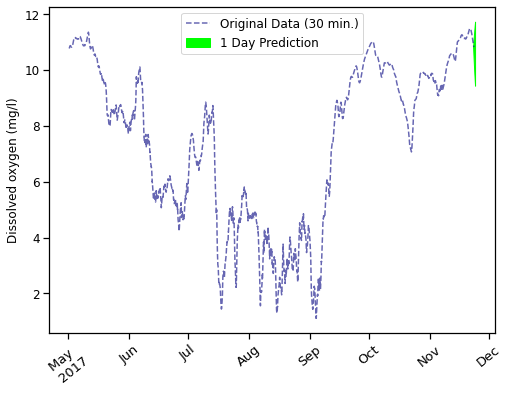

[736450. 736481. 736511. 736542. 736573. 736603. 736634. 736664.]


In [80]:
simple_oxygen_mean_all_30min_nonan_start_may = simple_oxygen_mean_may_sept_30min_nonan["2017-05-01 15:00:00": "2017-11-30 15:00:00"]

ax_get_xticks = [736450., 736481., 736511., 736542., 736573., 736603., 736634., 736664.,]

ax_labels = ['May \n 2017', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(simple_oxygen_mean_all_30min_nonan_start_may, linestyle='--', label='Original Data (30 min.)', color='navy', alpha=0.6)
# plt.plot(all_2017_fit_startmay, color='red', alpha=0.4, linestyle='-.', label='ARIMA Fit')
plt.fill_between(future_dates_1D_Nov, x_48[2][:, 0], x_48[2][:, 1], label='1 Day Prediction', color='lime')
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=12)
plt.yticks(fontsize=13)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=39)
ax.tick_params(axis='y', which='major', labelsize=12)
plt.xticks(ax_get_xticks, ax_labels, fontsize=13, rotation=39)
plt.legend(fontsize=12)
plt.show()

print (ax.get_xticks())

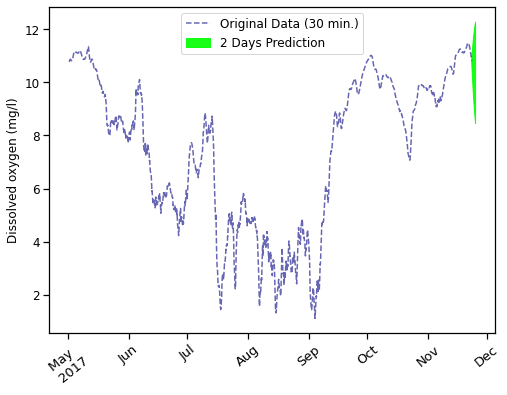

[736450. 736481. 736511. 736542. 736573. 736603. 736634. 736664.]


In [83]:
ax_get_xticks = [736450., 736481., 736511., 736542., 736573., 736603., 736634., 736664.]

ax_labels_2day = ['May \n 2017', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(simple_oxygen_mean_all_30min_nonan_start_may, alpha=0.6, linestyle='--', color='navy', label='Original Data (30 min.)')
plt.fill_between(future_dates_2D_Nov, x_96[2][:, 0], x_96[2][:, 1], label='2 Days Prediction', color='lime', alpha=0.9)
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=13)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=39)
ax.tick_params(axis='y', which='major', labelsize=12)
plt.xticks(ax_get_xticks, ax_labels_2day, fontsize=13, rotation=39)
plt.show()

print (ax.get_xticks())

##  2021 Data

In [84]:
path_to_file = '/content/drive/My Drive/Colab Notebooks/Cave_Data/'

data_csv_2021 = pd.read_csv(path_to_file + 'OxygenandTemp_2021.csv', sep=',', parse_dates=[['Date', 'Time']])
data_csv_2021.head(3)

Date_Time  DO (mg/L)  Temp (°C)
0 2021-03-08 11:00:00      14.42       5.32
1 2021-03-08 11:15:00      14.47       5.40
2 2021-03-08 11:30:00      14.58       5.48

In [85]:
cave_data2021 = data_csv_2021.rename({'Date_Time': 'datetime' ,'DO (mg/L)': 'Oxygen', 'Temp (°C)': 'Temp'}, axis=1)

cave_data2021['datetime'] = pd.to_datetime(cave_data2021['datetime'])
cave_data2021 = cave_data2021.set_index('datetime') 

print(cave_data2021.head(5))
print ('\n')
print ('cave data shape: ', cave_data2021.shape)

                     Oxygen  Temp
datetime                         
2021-03-08 11:00:00   14.42  5.32
2021-03-08 11:15:00   14.47  5.40
2021-03-08 11:30:00   14.58  5.48
2021-03-08 11:45:00   14.65  5.54
2021-03-08 12:00:00   14.61  5.62


cave data shape:  (19967, 2)


In [86]:
cave_data2021.index.max()

Timestamp('2021-10-02 10:30:00')

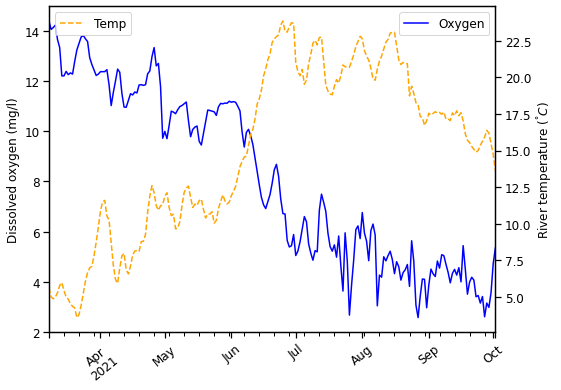

In [87]:

resampled_oxygen1_Daily_org_2021 = cave_data2021["Oxygen"].resample("D").mean() # hourly samples
resampled_temp1_Daily_org_2021 = cave_data2021["Temp"].resample("D").mean() # hourly samples

ax = resampled_oxygen1_Daily_org_2021.plot(color='blue', label='Oxygen', figsize=(8, 6))
ax2 = resampled_temp1_Daily_org_2021.plot(secondary_y=True, color='orange', ax=ax, linestyle='--', label='Temp')

ax.set_ylabel('Dissolved oxygen (mg/l)', fontsize=12)
ax2.set_ylabel(r'River temperature $({}^{\degree} C)$', fontsize=12)
ax.set_xlabel('')
ax.tick_params(axis='x', which='major', labelsize=12, rotation=39)
ax.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax.legend()
ax2.legend(['Temp'], loc=2)

plt.show()

select dataframe shape:  (14497, 2)


Text(0.5, 0, 'Date-Time')

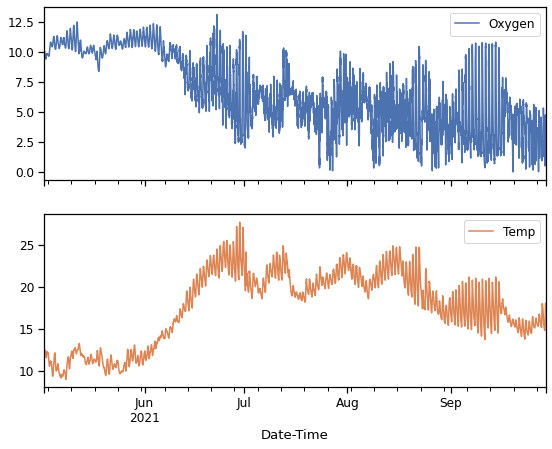

In [88]:
cave_data2021_may_sept = cave_data2021["2021-05-01 15:00:00": "2021-09-29 15:00:00"]
print ('select dataframe shape: ', cave_data2021_may_sept.shape)

fig, ax = cave_data2021_may_sept.plot(subplots=True, figsize=(9, 7))
ax.set_xlabel('Date-Time')

In [89]:
#### select parts of dataframe based on column value ['Oxygen']

cave_data2021_may_sept_O2_0_0d5 = cave_data2021_may_sept[(cave_data2021_may_sept['Oxygen'] >= 0.01) & (cave_data2021_may_sept['Oxygen'] <= 0.5)]

print (cave_data2021_may_sept_O2_0_0d5.shape)

(76, 2)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


Text(0.5, 0, '')

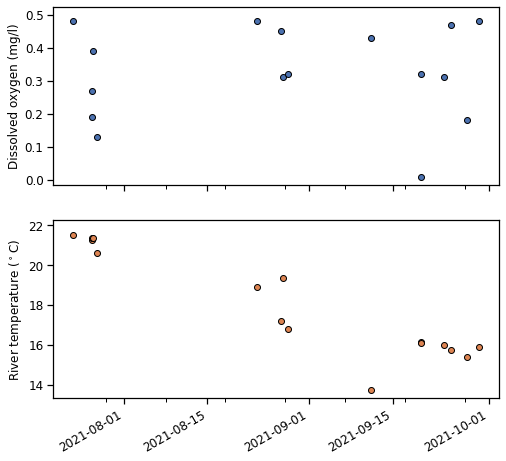

In [90]:
fig, ax = plt.subplots(1, figsize=(8, 8), sharex=True)
low_o2_21 = cave_data2021_may_sept_O2_0_0d5.plot(subplots=True, figsize=(8, 6), linestyle='None', 
                                            markevery=5, marker='o', 
                                            markeredgecolor='black', sharex=True, ax=ax, legend=False)

low_o2_21[0].set_ylabel('Dissolved oxygen (mg/l)', fontsize=12)
low_o2_21[1].set_ylabel(r'River temperature $({}^\circ \mathrm{C})$', fontsize=12)
# low_o2_17[0].set_ylabel
plt.xticks(fontsize=12)
low_o2_21[0].tick_params(axis='both', which='major', labelsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')

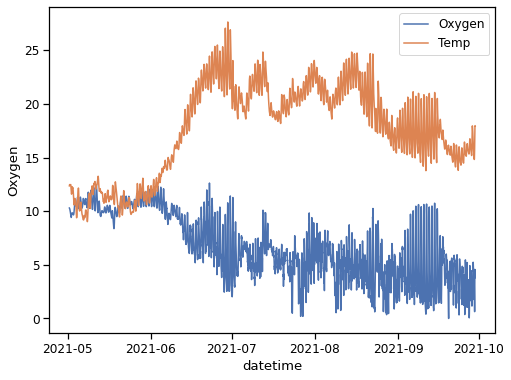

total samples of daily data:  3625


In [91]:
resampled_oxygen2021_h = cave_data2021_may_sept["Oxygen"].resample("60T").mean() # hourly samples
resampled_temp2021_h = cave_data2021_may_sept["Temp"].resample("60T").mean() # hourly samples

fig = plt.figure(figsize=(8, 6))
sns.lineplot(data = resampled_oxygen2021_h, label='Oxygen')
sns.lineplot(data = resampled_temp2021_h, label='Temp')
plt.show()

print ('total samples of daily data: ', len(resampled_oxygen2021_h))

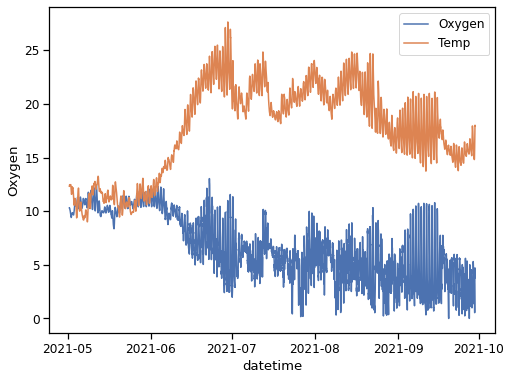

total samples of daily data:  7249


In [92]:
resampled_oxygen2021_30min = cave_data2021_may_sept["Oxygen"].resample("30T").mean() # hourly samples
resampled_temp2021_30min = cave_data2021_may_sept["Temp"].resample("30T").mean() # hourly samples

fig = plt.figure(figsize=(8, 6))
sns.lineplot(data = resampled_oxygen2021_30min, label='Oxygen')
sns.lineplot(data = resampled_temp2021_30min, label='Temp')
plt.show()

print ('total samples of daily data: ', len(resampled_oxygen2021_30min))

In [93]:
### sliding window approach 

oxy2021 = cave_data2021_may_sept['Oxygen']
# oxy2017.plot(figsize=(8, 6))
N_2021 = len(oxy2021)
time2021 = np.arange(0, N_2021)
print (len(cave_data2021_may_sept), len(time2021))
print (len(cave_data2021_may_sept['Temp']))

#################################
#used for setting labels
#################################
dt_ind_2021 = cave_data2021_may_sept.index.tolist()

dt_ind2021_choice = dt_ind_2021[::750]
time2021_choice = time2021[::750]
##################################


#####possible hyper-parameters
window_percentage = 96*1 # 24*4 for a single day
k = int(len(oxy2021) * (window_percentage/100))
print ('check: ', (k, N_2021))
##########################

oxy2021 = oxy2021.to_numpy()

get_bands2021 = lambda data : (np.mean(data) + 2*np.std(data), np.mean(data) - 2*np.std(data))
# get_bands = lambda data : (np.mean(data) + np.nanquantile(data, 0.99), np.mean(data) - np.nanquantile(data, 0.99))

bands_2021 = [get_bands2021(oxy2021[range(0 if i - k < 0 else i-k, i + k if i + k < N_2021 else N_2021)]) for i in range(0, N_2021)]
upper2021, lower2021 = zip(*bands_2021)

# compute local outliers 
# anomalies = (oxy2017 > upper) | (oxy2017 < lower)
anomalies2021 = (oxy2021 < lower2021) # focus only where the values are too low

14497 14497
14497
check:  (13917, 14497)


In [94]:
dt_ind2021_choice_m = dt_ind_2021[::1500]
time2021_choice_m = time2021[::1500]

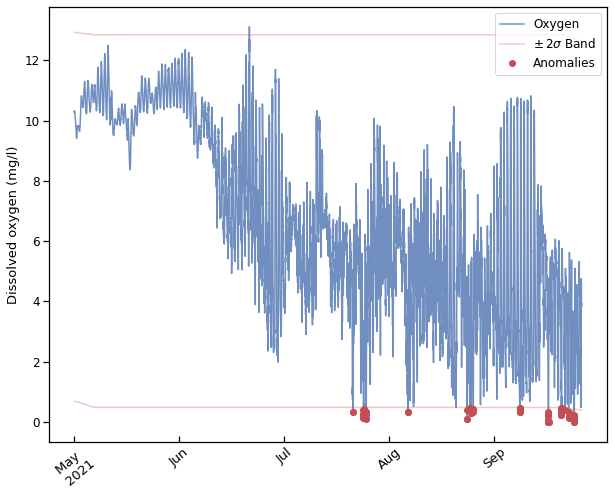

[    0  1500  3000  4500  6000  7500  9000 10500 12000 13500]


In [95]:
# plotting...

# label_size = 12
# mpl.rcParams['xtick.labelsize'] = label_size 
# mpl.rcParams['ytick.labelsize'] = label_size
time2021_choice_m_sel = [0, 3000, 6000, 9000, 12000]
label_dates_2021 = ['May \n 2021', 'Jun', 'Jul', 'Aug', 'Sep']

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time2021, oxy2021, 'b', label='Oxygen', alpha=0.8)
plt.plot(time2021, upper2021, 'r-', label=r'$\pm\, 2\sigma$ Band',alpha=0.3)
plt.plot(time2021, lower2021,'r-',alpha=0.3)

plt.plot(time2021[anomalies2021], oxy2021[anomalies2021], 'ro', label='Anomalies')
# plt.fill_between(time2021, upper2021, lower2021, facecolor='red', alpha=0.1)
plt.xticks(time2021_choice_m_sel, label_dates_2021, rotation=40, fontsize=13,)
ax.tick_params(axis="x",direction="in", )
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=13)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.show()

print (time2021_choice_m)

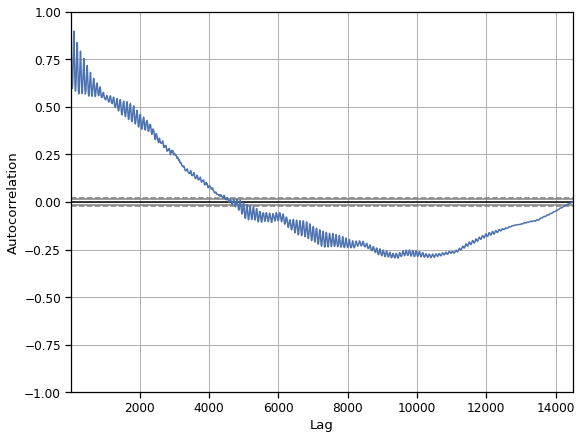

In [97]:
pd.plotting.autocorrelation_plot(cave_data2021_may_sept['Oxygen'])

In [98]:
from statsmodels.tsa.stattools import adfuller
cave_data_testADF_h_2021 = adfuller(resampled_oxygen2021_h, )

#np.log2(m, out=np.zeros_like(m), where=(m!=0))

cavedfoutput_ADF_h_2021 = pd.Series(cave_data_testADF_h_2021[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in cave_data_testADF_h_2021[4].items():
    cavedfoutput_ADF_h_2021['Critical Value (%s)'%key] = value
    
print(cavedfoutput_ADF_h_2021)

Test Statistic                   -1.669553
p-value                           0.446864
#Lags Used                       24.000000
Number of Observations Used    3600.000000
Critical Value (1%)              -3.432168
Critical Value (5%)              -2.862343
Critical Value (10%)             -2.567198
dtype: float64


In [99]:

cave_data_testADF_30min_2021 = adfuller(resampled_oxygen2021_30min, )
cave_data_testADF_30min_2021_temp = adfuller(resampled_temp2021_30min, )


#np.log2(m, out=np.zeros_like(m), where=(m!=0))

print('for O2')
cavedfoutput_ADF_30min_2021 = pd.Series(cave_data_testADF_30min_2021[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in cave_data_testADF_30min_2021[4].items():
    cavedfoutput_ADF_30min_2021['Critical Value (%s)'%key] = value
    
print(cavedfoutput_ADF_30min_2021)

print('\n')

print('Temp')

cavedfoutput_ADF_30min_2021_temp = pd.Series(cave_data_testADF_30min_2021_temp[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in cave_data_testADF_30min_2021_temp[4].items():
    cavedfoutput_ADF_30min_2021_temp['Critical Value (%s)'%key] = value
    
print(cavedfoutput_ADF_30min_2021_temp)


for O2
Test Statistic                   -2.670299
p-value                           0.079320
#Lags Used                       36.000000
Number of Observations Used    7212.000000
Critical Value (1%)              -3.431257
Critical Value (5%)              -2.861941
Critical Value (10%)             -2.566983
dtype: float64


Temp
Test Statistic                   -1.280934
p-value                           0.637849
#Lags Used                       36.000000
Number of Observations Used    7212.000000
Critical Value (1%)              -3.431257
Critical Value (5%)              -2.861941
Critical Value (10%)             -2.566983
dtype: float64


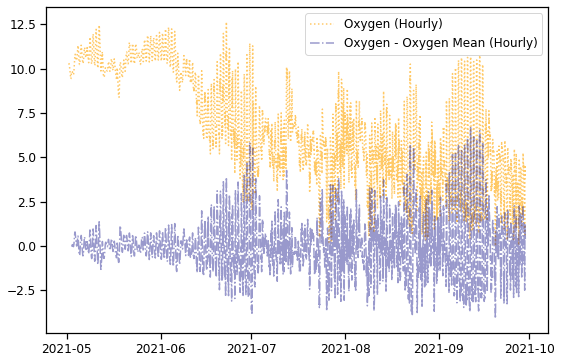

check min of difference series;  nan


In [100]:
simple_oxygen_mean_may_sept_h_2021 = resampled_oxygen2021_h.rolling(window=24).mean()

check_diff_oxygen_h_2021 = resampled_oxygen2021_h - simple_oxygen_mean_may_sept_h_2021 

fig = plt.figure(figsize=(9, 6))
plt.plot(resampled_oxygen2021_h, color='orange', linestyle=':', alpha=0.6, label='Oxygen (Hourly)')
plt.plot(check_diff_oxygen_h_2021, color='navy', linestyle='-.', alpha=0.4, label='Oxygen - Oxygen Mean (Hourly)')
plt.legend(fontsize=12)
plt.show()

print ('check min of difference series; ', min(check_diff_oxygen_h_2021))

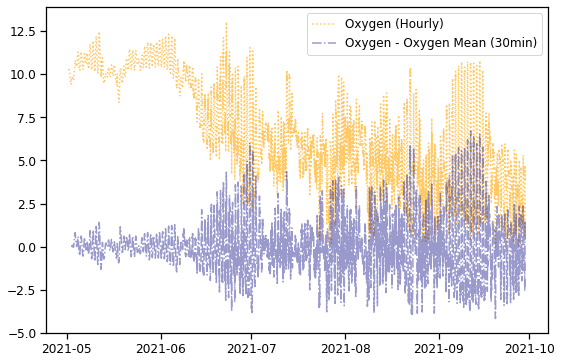

check min of difference series;  nan


In [101]:
simple_oxygen_mean_may_sept_30min_2021 = resampled_oxygen2021_30min.rolling(window=48).mean()

check_diff_oxygen_30min_2021 = resampled_oxygen2021_30min - simple_oxygen_mean_may_sept_30min_2021 

fig = plt.figure(figsize=(9, 6))
plt.plot(resampled_oxygen2021_30min, color='orange', linestyle=':', alpha=0.6, label='Oxygen (Hourly)')
plt.plot(check_diff_oxygen_30min_2021, color='navy', linestyle='-.', alpha=0.4, label='Oxygen - Oxygen Mean (30min)')
plt.legend(fontsize=12)
plt.show()

print ('check min of difference series; ', min(check_diff_oxygen_30min_2021))

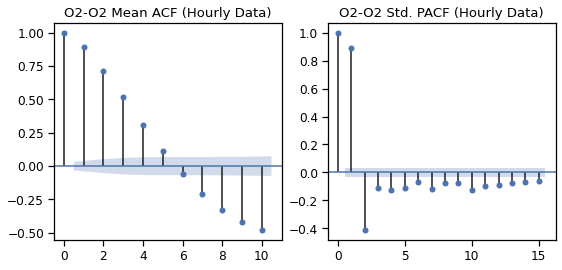

3602


In [102]:
check_diff_oxygen_h_nonan_2021 = check_diff_oxygen_h_2021.dropna()

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plot_acf(check_diff_oxygen_h_nonan_2021, axs[0], lags=10)
plot_pacf(check_diff_oxygen_h_nonan_2021, axs[1], lags=15)
axs[0].set_title('O2-O2 Mean ACF (Hourly Data)')
axs[1].set_title('O2-O2 Std. PACF (Hourly Data)')
plt.show()
print (len(check_diff_oxygen_h_nonan_2021))

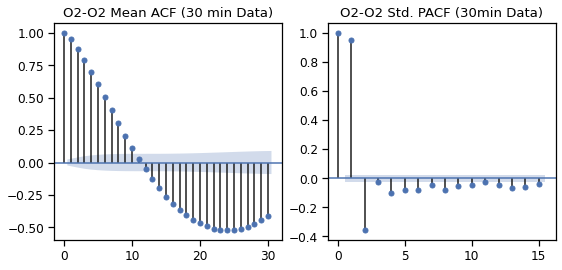

7202


In [103]:
check_diff_oxygen_30min_nonan_2021 = check_diff_oxygen_30min_2021.dropna()

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plot_acf(check_diff_oxygen_30min_nonan_2021, axs[0], lags=30)
plot_pacf(check_diff_oxygen_30min_nonan_2021, axs[1], lags=15)
axs[0].set_title('O2-O2 Mean ACF (30 min Data)')
axs[1].set_title('O2-O2 Std. PACF (30min Data)')
plt.show()
print (len(check_diff_oxygen_30min_nonan_2021))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


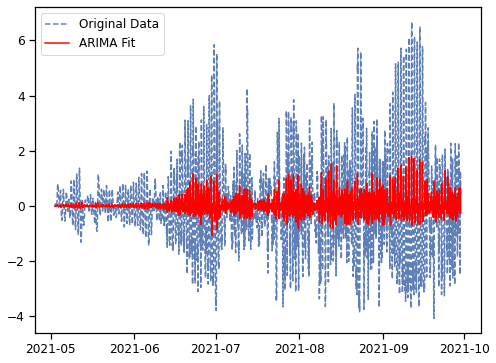

In [104]:
### apply arima with p, q obtained from before 
from statsmodels.tsa.arima_model import ARIMA

model_1_2021 = ARIMA(check_diff_oxygen_h_nonan_2021, order=(1, 1, 1))
results_ARIMA_mean_nonan_1_2021 = model_1_2021.fit(disp=-1)

fig = plt.figure(figsize=(8, 6))

plt.plot(check_diff_oxygen_h_nonan_2021, alpha=0.9, linestyle='--', label='Original Data')
plt.plot(results_ARIMA_mean_nonan_1_2021.fittedvalues, color='red',  label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

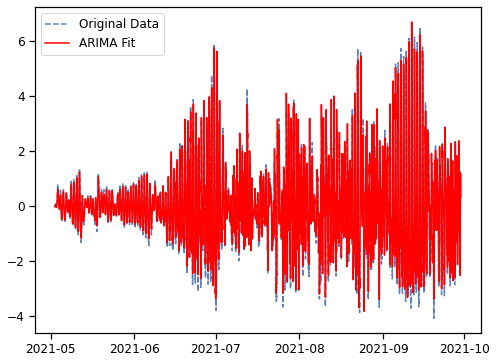

In [105]:
### apply arima with p, q obtained from before 

model_2_2021 = ARIMA(check_diff_oxygen_h_nonan_2021, order=(4, 0, 1))
results_ARIMA_mean_nonan_2_2021 = model_2_2021.fit(disp=-1)

fig = plt.figure(figsize=(8, 6))

plt.plot(check_diff_oxygen_h_nonan_2021, alpha=0.9, linestyle='--', label='Original Data')
plt.plot(results_ARIMA_mean_nonan_2_2021.fittedvalues, color='red',  label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

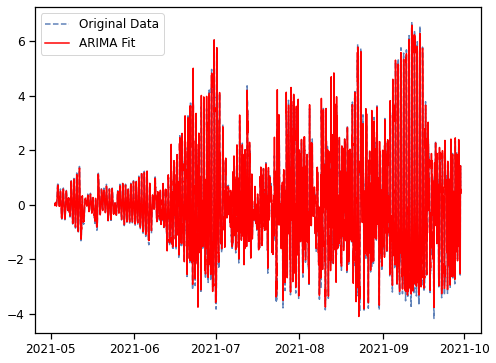

In [106]:
### apply arima with p, q obtained from before for 30 minutes data

model_3_2021_30min = ARIMA(check_diff_oxygen_30min_nonan_2021, order=(8, 0, 1)) # once again try several values for order e.g. from 3 to 15
results_ARIMA_mean_nonan_3_2021_30min = model_3_2021_30min.fit(disp=-1)

fig = plt.figure(figsize=(8, 6))

plt.plot(check_diff_oxygen_30min_nonan_2021, alpha=0.9, linestyle='--', label='Original Data')
plt.plot(results_ARIMA_mean_nonan_3_2021_30min.fittedvalues, color='red',  label='ARIMA Fit')
plt.legend(fontsize=12)
plt.show()

In [108]:
### arima_predictions

print (type(check_diff_oxygen_h_nonan_2021))

diff_oxygen_hourly_nonan_df_2021 = check_diff_oxygen_h_nonan_2021.to_frame()
diff_oxygen_hourly_nonan_df_2021.head(3)
# predicted_df = pd.DataFrame()
# predicted_df['dates'] = check_diff_oxygen_h_nonan[]

<class 'pandas.core.series.Series'>


Oxygen
datetime                     
2021-05-02 14:00:00 -0.031771
2021-05-02 15:00:00 -0.016458
2021-05-02 16:00:00  0.010208

In [109]:
### arima_predictions

print (type(check_diff_oxygen_30min_nonan_2021))

diff_oxygen_30min_nonan_df_2021 = check_diff_oxygen_30min_nonan_2021.to_frame()

diff_oxygen_30min_nonan_df_2021['Arima_Preds'] = results_ARIMA_mean_nonan_3_2021_30min.fittedvalues
diff_oxygen_30min_nonan_df_2021.head(3)

<class 'pandas.core.series.Series'>


Oxygen  Arima_Preds
datetime                                  
2021-05-02 14:30:00 -0.034271    -0.020630
2021-05-02 15:00:00 -0.028854    -0.033627
2021-05-02 15:30:00 -0.013958    -0.026394

In [110]:
classify_df_2021_30min = detect_classify_anomalies(diff_oxygen_30min_nonan_df_2021, 24*1, 3)
classify_df_2021_30min[2095:2105]

Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2021-06-15 06:00:00 -1.566458    -1.312338 -0.254120          16.222610   
2021-06-15 06:30:00 -1.659375    -1.392698 -0.266677          16.070948   
2021-06-15 07:00:00 -1.415104    -1.473058  0.057954          -4.095367   
2021-06-15 07:30:00 -1.469583    -1.129233 -0.340351          23.159670   
2021-06-15 08:00:00 -1.169688    -1.279393  0.109706          -9.379084   
2021-06-15 08:30:00 -0.707396    -0.873669  0.166273         -23.504922   
2021-06-15 09:00:00 -0.467500    -0.400871 -0.066629          14.252144   
2021-06-15 09:30:00 -0.314375    -0.228665 -0.085710          27.263650   
2021-06-15 10:00:00 -0.106979    -0.108526  0.001547          -1.445753   
2021-06-15 10:30:00 -0.156250     0.126097 -0.282347         180.701842   

                     anomaly_percentage_change   meanval  deviation       -3s  \
datetime                                                                        
2021-06-15 06:00:00                        NaN -0.082108   0.175495 -0.520847   
2021-06-15 06:30:00                        NaN -0.107719   0.153469 -0.491392   
2021-06-15 07:00:00                        NaN -0.108167   0.152947 -0.490534   
2021-06-15 07:30:00                        NaN -0.110361   0.155982 -0.500315   
2021-06-15 08:00:00                        NaN -0.104019   0.161844 -0.508630   
2021-06-15 08:30:00                        NaN -0.101065   0.166230 -0.516639   
2021-06-15 09:00:00                        NaN -0.087905   0.155113 -0.475689   
2021-06-15 09:30:00                        NaN -0.091221   0.154137 -0.476563   
2021-06-15 10:00:00                        NaN -0.083242   0.153760 -0.467642   
2021-06-15 10:30:00                   -0.15625 -0.096371   0.156847 -0.488488   

                          -2s       -1s  impact  color    region  \
datetime                                                           
2021-06-15 06:00:00 -0.398000 -0.257604       3      0  NEGATIVE   
2021-06-15 06:30:00 -0.383964 -0.261188       2      1  NEGATIVE   
2021-06-15 07:00:00 -0.383471 -0.261114       3      0  NEGATIVE   
2021-06-15 07:30:00 -0.391127 -0.266342       2      1  NEGATIVE   
2021-06-15 08:00:00 -0.395339 -0.265864       3      0  NEGATIVE   
2021-06-15 08:30:00 -0.400279 -0.267295       3      0  NEGATIVE   
2021-06-15 09:00:00 -0.367109 -0.243019       3      0  NEGATIVE   
2021-06-15 09:30:00 -0.368667 -0.245358       3      0  NEGATIVE   
2021-06-15 10:00:00 -0.360010 -0.237002       3      0  NEGATIVE   
2021-06-15 10:30:00 -0.378695 -0.253218       2      1  NEGATIVE   

                     anomaly_points  
datetime                             
2021-06-15 06:00:00             NaN  
2021-06-15 06:30:00             NaN  
2021-06-15 07:00:00             NaN  
2021-06-15 07:30:00             NaN  
2021-06-15 08:00:00             NaN  
2021-06-15 08:30:00             NaN  
2021-06-15 09:00:00             NaN  
2021-06-15 09:30:00             NaN  
2021-06-15 10:00:00             NaN  
2021-06-15 10:30:00             NaN

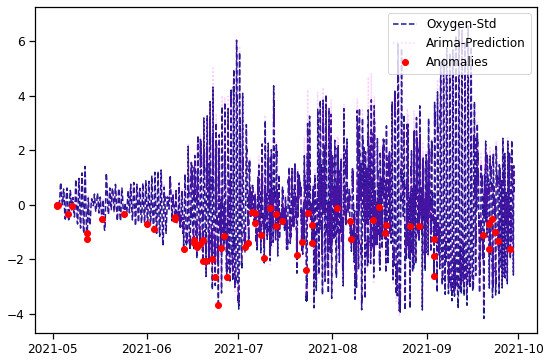

In [111]:
fig = plt.figure(figsize=(9, 6))
#plt.plot(cave_data1_may_sept['Oxygen'], color='orange', linestyle=':', alpha=0.6, label='Oxygen')
plt.plot(classify_df_2021_30min.Oxygen, color='navy', linestyle='--', alpha=0.9, label='Oxygen-Std')
plt.plot(classify_df_2021_30min.Arima_Preds, color='magenta', linestyle=':', alpha=0.2, label='Arima-Prediction')
plt.plot(classify_df_2021_30min.anomaly_points, color='red', linestyle='None', marker='o', label='Anomalies')
plt.legend(fontsize=12, loc=1)
plt.show()

In [112]:
print (simple_oxygen_mean_may_sept_h_2021.isna().sum())
simple_oxygen_mean_may_sept_h_nonan_2021 = simple_oxygen_mean_may_sept_h_2021.dropna()

23


In [113]:
print (simple_oxygen_mean_may_sept_30min_2021.isna().sum())
simple_oxygen_mean_may_sept_30min_nonan_2021 = simple_oxygen_mean_may_sept_30min_2021.dropna()

47


In [114]:
classify_df_2021_30min['Mean_Oxy'] = simple_oxygen_mean_may_sept_30min_nonan_2021
classify_df_2021_30min['TotOxy'] = classify_df_2021_30min['Mean_Oxy'] + classify_df_2021_30min['Oxygen']
classify_df_2021_30min['FinalAnomaly'] = classify_df_2021_30min['anomaly_points'] + simple_oxygen_mean_may_sept_30min_nonan_2021 
classify_df_2021_30min.drop(labels='region', axis=1, inplace=True)
classify_df_2021_30min.head(3)

Oxygen  Arima_Preds     error  percentage_change  \
datetime                                                                  
2021-05-02 14:30:00 -0.034271    -0.020630 -0.013641          39.802770   
2021-05-02 15:00:00 -0.028854    -0.033627  0.004773         -16.542123   
2021-05-02 15:30:00 -0.013958    -0.026394  0.012436         -89.092951   

                     anomaly_percentage_change  meanval  deviation  -3s  -2s  \
datetime                                                                       
2021-05-02 14:30:00                        NaN      NaN        NaN  NaN  NaN   
2021-05-02 15:00:00                        NaN      NaN        NaN  NaN  NaN   
2021-05-02 15:30:00                        NaN      NaN        NaN  NaN  NaN   

                     -1s  impact  color  anomaly_points  Mean_Oxy  TotOxy  \
datetime                                                                    
2021-05-02 14:30:00  NaN       0      3       -0.034271  9.844271   9.810   
2021-05-02 15:00:00  NaN       0      3       -0.028854  9.833854   9.805   
2021-05-02 15:30:00  NaN       0      3       -0.013958  9.823958   9.810   

                     FinalAnomaly  
datetime                           
2021-05-02 14:30:00         9.810  
2021-05-02 15:00:00         9.805  
2021-05-02 15:30:00         9.810

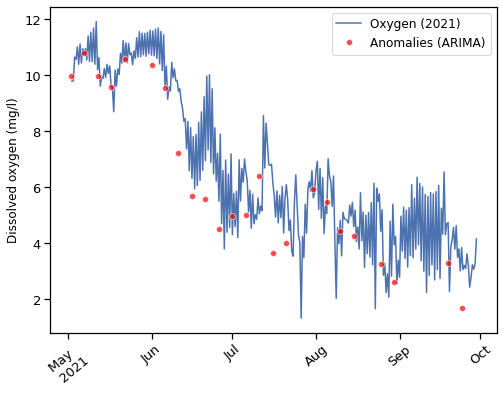

[737911. 737942. 737972. 738003. 738034. 738064.]


In [115]:
classify_df_30min_May_Sept_2021 = classify_df_2021_30min["2021-05-01 15:00:00": "2021-09-30 15:00:00"]
resampled_oxygen1_30Minutes_an_2021 = classify_df_30min_May_Sept_2021["TotOxy"].resample("720T").mean() # 
resampled_30Minutes_anomaly_2021 = classify_df_30min_May_Sept_2021["FinalAnomaly"].resample("5D").mean() # 30 minutes

# resampled_30Minutes_anomaly_2021.index[5]
# resampled_30Minutes_anomaly_drop_2021 = resampled_30Minutes_anomaly_2021.drop(labels=[resampled_30Minutes_anomaly_2021.index[10], resampled_30Minutes_anomaly.index[11]], 
#                                                                     inplace=False)
# print (resampled_30Minutes_anomaly_drop)

x_ticks_sns2021 = [737911., 737942., 737972., 738003., 738034., 738064.]
x_labels_2021_anomaly = ['May \n 2021', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

sns.set_theme(style={'axes.facecolor': 'white', 'ytick.left': True, 'xtick.bottom': True,}, 
              font_scale=1.1, )
fig = plt.figure(figsize=(8, 6))
lin = sns.lineplot(data = resampled_oxygen1_30Minutes_an_2021, label='Oxygen (2021)')
lin = sns.lineplot(data = resampled_30Minutes_anomaly_2021, marker='o', linestyle='', 
                   label='Anomalies (ARIMA)', color='red', alpha=0.7)
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=12)
plt.xlabel('')
plt.xticks(x_ticks_sns2021, x_labels_2021_anomaly, rotation=40, fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print (lin.get_xticks())

In [116]:
print(len(resampled_30Minutes_anomaly_2021), '\n', resampled_30Minutes_anomaly_2021)

31 
 datetime
2021-05-02     9.975000
2021-05-07    10.810000
2021-05-12     9.980000
2021-05-17     9.575000
2021-05-22    10.595000
2021-05-27          NaN
2021-06-01    10.367500
2021-06-06     9.547500
2021-06-11     7.245000
2021-06-16     5.676429
2021-06-21     5.570000
2021-06-26     4.517500
2021-07-01     4.995000
2021-07-06     5.027500
2021-07-11     6.415000
2021-07-16     3.660000
2021-07-21     4.019000
2021-07-26          NaN
2021-07-31     5.935000
2021-08-05     5.480000
2021-08-10     4.460000
2021-08-15     4.261667
2021-08-20          NaN
2021-08-25     3.265000
2021-08-30     2.615000
2021-09-04          NaN
2021-09-09          NaN
2021-09-14          NaN
2021-09-19     3.290000
2021-09-24     1.702500
2021-09-29          NaN
Freq: 5D, Name: FinalAnomaly, dtype: float64


In [117]:
model_3_2021_30min = ARIMA(check_diff_oxygen_30min_nonan_2021, order=(8, 0, 1))
results_ARIMA_mean_nonan_3_2021_30min = model_3_2021_30min.fit(disp=-1)

n_periods = 48
x2021_48 = results_ARIMA_mean_nonan_3_2021_30min.forecast(n_periods, alpha=0.05) # get_forecast
print(x2021_48) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(array([ 0.27781284,  0.20926302,  0.17954182,  0.16885469,  0.14763955,
        0.14183944,  0.12946443,  0.09774885,  0.06329894,  0.0268858 ,
       -0.01030787, -0.04754609, -0.08250877, -0.1135167 , -0.14112766,
       -0.16463343, -0.18373249, -0.19881067, -0.21003817, -0.21751793,
       -0.22131836, -0.2216329 , -0.2186657 , -0.21259725, -0.20368154,
       -0.19220686, -0.17848204, -0.16284402, -0.14565264, -0.12728016,
       -0.10809682, -0.08846762, -0.06874704, -0.04927108, -0.03035298,
       -0.01227965,  0.00469171,  0.02033636,  0.03446391,  0.04691929,
        0.05758359,  0.0663741 ,  0.07324372,  0.07817991,  0.08120306,
        0.08236441,  0.08174356,  0.07944568]), array([0.43357388, 0.68720175, 0.85349001, 0.97456753, 1.06665895,
       1.13921277, 1.19112957, 1.2290956 , 1.25569322, 1.27207741,
       1.28191562, 1.28736089, 1.28977721, 1.29037032, 1.29037032,
       1.29089465, 1.29288718, 1.29706203, 1.30384533, 1.31340431,
       1.32563487, 1.34018991, 1.35

In [118]:
future_dates_1D_Nov_2021 = pd.date_range(start='2021-09-30 03:00:00', periods=48, freq='30T')
print(future_dates_1D_Nov_2021, len(future_dates_1D_Nov_2021))

DatetimeIndex(['2021-09-30 03:00:00', '2021-09-30 03:30:00',
               '2021-09-30 04:00:00', '2021-09-30 04:30:00',
               '2021-09-30 05:00:00', '2021-09-30 05:30:00',
               '2021-09-30 06:00:00', '2021-09-30 06:30:00',
               '2021-09-30 07:00:00', '2021-09-30 07:30:00',
               '2021-09-30 08:00:00', '2021-09-30 08:30:00',
               '2021-09-30 09:00:00', '2021-09-30 09:30:00',
               '2021-09-30 10:00:00', '2021-09-30 10:30:00',
               '2021-09-30 11:00:00', '2021-09-30 11:30:00',
               '2021-09-30 12:00:00', '2021-09-30 12:30:00',
               '2021-09-30 13:00:00', '2021-09-30 13:30:00',
               '2021-09-30 14:00:00', '2021-09-30 14:30:00',
               '2021-09-30 15:00:00', '2021-09-30 15:30:00',
               '2021-09-30 16:00:00', '2021-09-30 16:30:00',
               '2021-09-30 17:00:00', '2021-09-30 17:30:00',
               '2021-09-30 18:00:00', '2021-09-30 18:30:00',
               '2021-09-

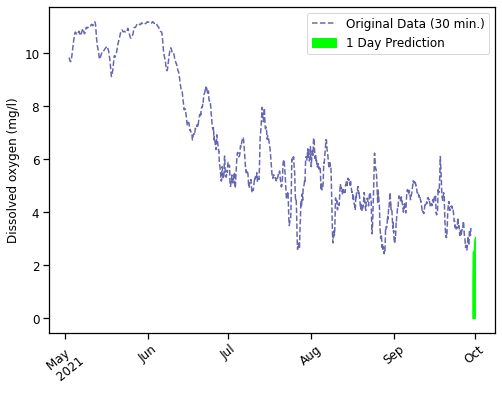

[737911. 737942. 737972. 738003. 738034. 738064.]


In [119]:
simple_oxygen_mean_all_30min_nonan_2021_start_may = simple_oxygen_mean_may_sept_30min_nonan_2021["2021-05-01 15:00:00": "2021-09-30 15:00:00"]
# x2021_48[2][:, 0] 

ax_get_xticks2021 = [737911., 737942., 737972., 738003., 738034., 738064.]
ax_labels_2021 = ['May \n 2021', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'] 

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(simple_oxygen_mean_all_30min_nonan_2021_start_may, linestyle='--', label='Original Data (30 min.)', color='navy', alpha=0.6)
# plt.plot(all_2017_fit_startmay, color='red', alpha=0.4, linestyle='-.', label='ARIMA Fit')
plt.fill_between(future_dates_1D_Nov_2021, [0*i for i in range(len(x2021_48[2][:, 0]))], x2021_48[2][:, 1], label='1 Day Prediction', color='lime')
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=12)
plt.yticks(fontsize=13)
plt.xticks(ax_get_xticks2021, ax_labels_2021, fontsize=13, rotation=39)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=39)
ax.tick_params(axis='y', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.show()

print (ax.get_xticks())

In [120]:
future_dates_2D_Nov_2021 = pd.date_range(start='2021-09-29 15:00:00', periods=96, freq='30T')
print(future_dates_2D_Nov_2021, len(future_dates_2D_Nov_2021))

n_periods = 96
x2021_96 = results_ARIMA_mean_nonan_3_2021_30min.forecast(n_periods, alpha=0.05) # get_forecast
print(x2021_96) 

DatetimeIndex(['2021-09-29 15:00:00', '2021-09-29 15:30:00',
               '2021-09-29 16:00:00', '2021-09-29 16:30:00',
               '2021-09-29 17:00:00', '2021-09-29 17:30:00',
               '2021-09-29 18:00:00', '2021-09-29 18:30:00',
               '2021-09-29 19:00:00', '2021-09-29 19:30:00',
               '2021-09-29 20:00:00', '2021-09-29 20:30:00',
               '2021-09-29 21:00:00', '2021-09-29 21:30:00',
               '2021-09-29 22:00:00', '2021-09-29 22:30:00',
               '2021-09-29 23:00:00', '2021-09-29 23:30:00',
               '2021-09-30 00:00:00', '2021-09-30 00:30:00',
               '2021-09-30 01:00:00', '2021-09-30 01:30:00',
               '2021-09-30 02:00:00', '2021-09-30 02:30:00',
               '2021-09-30 03:00:00', '2021-09-30 03:30:00',
               '2021-09-30 04:00:00', '2021-09-30 04:30:00',
               '2021-09-30 05:00:00', '2021-09-30 05:30:00',
               '2021-09-30 06:00:00', '2021-09-30 06:30:00',
               '2021-09-

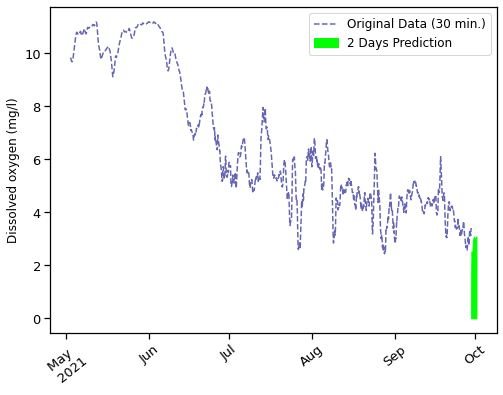

[737911. 737942. 737972. 738003. 738034. 738064.]


In [121]:
ax_get_xticks2021 = [737911., 737942., 737972., 738003., 738034., 738064.]
ax_labels_2021 = ['May \n 2021', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

fig = plt.figure(figsize=(8, 6))
plt.plot(simple_oxygen_mean_all_30min_nonan_2021_start_may, linestyle='--', label='Original Data (30 min.)', color='navy', alpha=0.6)
# plt.plot(all_2017_fit_startmay, color='red', alpha=0.4, linestyle='-.', label='ARIMA Fit')
plt.fill_between(future_dates_2D_Nov_2021, [0*i for i in range(len(x2021_96[2][:, 0]))], x2021_96[2][:, 1], label='2 Days Prediction', color='lime')
plt.ylabel('Dissolved oxygen (mg/l)', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=13)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=39)
ax.tick_params(axis='y', which='major', labelsize=12)
plt.xticks(ax_get_xticks2021, ax_labels_2021, fontsize=13, rotation=39)
plt.show()

print (ax.get_xticks())

### Deep Learning Steps (Autoencoder)


.... To be continued ....